# Exploratory Data Analysis

<a id="0"></a> <br>
 # Table of Contents  
1. [Introduction](#1)     
    1. [Problem Definition](#2) 
    1. [Data description](#4)
1. [Data Understanding](#5)
1. [Data Preparation](#6) 
1. [Feature Understanding and Feature Relationships](#7)  
    1. [Target Data](#8)
    1. [Demographic data](#9) 
    1. [Socioeconomic data](#10)     
    1. [Macroeconomic data and Academic data at enrollment](#11)     
    1. [Academic data at the end of 1st semester](#12)     
    1. [Academic data at the end of 2nd semester](#13)     
1. [Questions about the data](#14) 
    1. [What causes dominance of single value for Nationality, International and Marital_Status columns in demographic data?](#15)       
    1. [How parents qualification affect to graduation?](#16)      
    1. [Impact of the scholarship on graduation](#17)         
    1. [The impact of previous qualifications on graduation](#18)             
    1. [The choice of which courses has a higher chance of successful completion of studies?](#19)
    1. [The impact of tuition fees on graduation](#20)
1. [Summary](#21)
1. [References](#22)

## 1. Introduction <a id="1"></a>

### A. Problem Definition <a id="2"></a>
Higher education institutions have vast data about students that can generate information and knowledge. School dropout and educational failure hinder economic growth and impact individuals, institutions, and society. To address this issue, we plan to conduct an exploratory data analysis using family background and past academic records. This analysis can provide insights into why students struggle to complete their education and help institutions develop strategies to prevent dropout and failure. By doing so, we can benefit students, institutions, and society as a whole by promoting economic growth, employment opportunities, competitiveness, and productivity.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns
pd.options.display.max_columns = 100
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

### B. Data description <a id="4"></a>

The dataset consists of information about undergraduate students from various databases in a higher education institution. It contains data on demographics, socioeconomic and macroeconomic status, as well as information on the students' enrollment and their progress during the first and second semesters. The dataset was sourced from https://zenodo.org/record/5777340#.ZAJvJy8w1QK, and a detailed description of the columns can be found at https://www.mdpi.com/2306-5729/7/11/146. <br/>

<sub>- **Demographic data:** <br/>
**Marital status**	(Numeric/discrete):
1—Single, 2—Married, 3—Widower, 4—Divorced, 5—Facto union, 6—Legally separated.
**Nationality**	(Numeric/discrete):
1—Portuguese, 2—German, 3—Spanish, 4—Italian, 5—Dutch, 6—English, 7—Lithuanian, 8—Angolan, 9—Cape Verdean, 
10—Guinean, 11—Mozambican, 12—Santomean, 13—Turkish, 14—Brazilian, 15—Romanian, 16—Moldova (Republic of), 
17—Mexican, 18—Ukrainian, 19—Russian, 20—Cuban, 21—Colombian.
**Displaced**	(Numeric/binary):
1—yes, 0—no.
**Gender**	(Numeric/binary):
1—male, 0—female.
**Age at enrollment**	(Numeric/discrete):
Age of the student at the enorllment time.
**International**	(Numeric/binary):
1—yes, 0—no.

<sub>- **Socioeconomic data:** <br/>
**Mother’s qualification / Father’s qualification**	(Numeric/discrete):
1—Secondary Education—12th Year of Schooling or Equivalent, 2—Higher Education—bachelor’s degree, 3—Higher Education—degree, 4—Higher Education—master’s degree, 5—Higher Education—doctorate, 6—Frequency of Higher Education, 7—12th Year of Schooling—not completed, 8—11th Year of Schooling—not completed, 9—7th Year (Old), 10—Other—11th Year of Schooling, 11—2nd year complementary high school course, 12—10th Year of Schooling,
13—General commerce course, 14—Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent, 15—Complementary High School Course, 16—Technical-professional course, 17—Complementary High School Course—not concluded, 18—7th year of schooling, 19—2nd cycle of the general high school course, 20—9th Year of Schooling—not completed, 21—8th year of schooling, 22—General Course of Administration and Commerce, 23—Supplementary Accounting and Administration, 24—Unknown, 25—Cannot read or write, 26—Can read without having a 4th year of schooling, 27—Basic education 1st cycle (4th/5th year) or equivalent, 28—Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent, 29—Technological specialization course, 30—Higher education—degree (1st cycle), 31—Specialized higher studies course, 32—Professional higher technical course, 33—Higher Education—master’s degree (2nd cycle), 34—Higher Education—doctorate (3rd cycle).
**Mother’s occupation	/ Father’s occupation**	(Numeric/discrete):
1—Student, 2—Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, 3—Specialists in Intellectual and Scientific Activities, 4—Intermediate Level Technicians and Professions, 5—Administrative staff, 6—Personal Services, Security and Safety Workers, and Sellers, 7—Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry, 8—Skilled Workers in Industry, Construction, and Craftsmen, 9—Installation and Machine Operators and Assembly Workers, 10—Unskilled Workers, 11—Armed Forces Professions, 12—Other Situation; 13—(blank), 14—Armed Forces Officers, 15—Armed Forces Sergeants, 16—Other Armed Forces personnel, 17—Directors of administrative and commercial services, 18—Hotel, catering, trade, and other services directors, 19—Specialists in the physical sciences, mathematics, engineering, and related techniques, 20—Health professionals, 21—Teachers, 22—Specialists in finance, accounting, administrative organization, and public and commercial relations, 23—Intermediate level science and engineering technicians and professions, 24—Technicians and professionals of intermediate level of health, 25—Intermediate level technicians from legal, social, sports, cultural, and similar services, 26—Information and communication technology technicians, 27—Office workers, secretaries in general, and data processing operators, 28—Data, accounting, statistical, financial services, and registry-related operators, 29—Other administrative support staff, 30—Personal service workers, 31—Sellers, 32—Personal care workers and the like, 33—Protection and security services personnel, 34—Market-oriented farmers and skilled agricultural and animal production workers, 35—Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence, 36—Skilled construction workers and the like, except electricians, 37—Skilled workers in metallurgy, metalworking, and similar, 38—Skilled workers in electricity and electronics, 39—Workers in food processing, woodworking, and clothing and other industries and crafts, 40—Fixed plant and machine operators, 41—Assembly workers, 42—Vehicle drivers and mobile equipment operators, 43—Unskilled workers in agriculture, animal production, and fisheries and forestry, 44—Unskilled workers in extractive industry, construction, manufacturing, and transport, 45—Meal preparation assistants, 46—Street vendors (except food) and street service providers.
**Educational special needs**	(Numeric/binary):
1—yes, 0—no.
**Debtor**	(Numeric/binary):
1—yes, 0—no.
**Tuition fees up to date**	(Numeric/binary):
1—yes, 0—no.
**Scholarship holder**	(Numeric/binary):
1—yes, 0—no.

<sub>- **Macroeconomic data:**<br/>
**Unemployment rate**	(Numeric/continuous).
**Inflation rate**	(Numeric/continuous).
**GDP**	(Numeric/continuous):
Gross Domestic Product .

<sub> - **Academic data at enrollment:**<br/>
**Application mode**	(Numeric/discrete):
1—1st phase—general contingent, 2—Ordinance No. 612/93, 3—1st phase—special contingent (Azores Island), 4—Holders of other higher courses, 5—Ordinance No. 854-B/99, 6—International student (bachelor), 7—1st phase—special contingent (Madeira Island), 8—2nd phase—general contingent, 9—3rd phase—general contingent, 10—Ordinance No. 533-A/99, item b2) (Different Plan), 11—Ordinance No. 533-A/99, item b3 (Other Institution), 12—Over 23 years old, 13—Transfer, 14—Change in course, 15—Technological specialization diploma holders, 16—Change in institution/course, 17—Short cycle diploma holders, 18—Change in institution/course (International).
**Application order**	(Numeric/ordinal):
Application order of the student (number of application).
**Course**	(Numeric/discrete):
1—Biofuel Production Technologies, 2—Animation and Multimedia Design, 3—Social Service (evening attendance), 4—Agronomy, 5—Communication Design, 6—Veterinary Nursing, 7—Informatics Engineering, 8—Equiniculture, 9—Management, 10—Social Service, 11—Tourism, 12—Nursing, 13—Oral Hygiene, 14—Advertising and Marketing Management, 15—Journalism and Communication, 16—Basic Education, 17—Management (evening attendance).
**Daytime/evening attendance**	(Numeric/binary):
1—daytime,0—evening.
**Previous qualification**	(Numeric/discrete):
1—Secondary education, 2—Higher education—bachelor’s degree, 3—Higher education—degree, 4—Higher education—master’s degree, 5—Higher education—doctorate, 6—Frequency of higher education, 7—12th year of schooling—not completed, 8—11th year of schooling—not completed, 9—Other—11th year of schooling, 10—10th year of schooling, 11—10th year of schooling—not completed, 12—Basic education 3rd cycle (9th/10th/11th year) or equivalent, 13—Basic education 2nd cycle (6th/7th/8th year) or equivalent, 14—Technological specialization course, 15—Higher education—degree (1st cycle), 16—Professional higher technical course, 17—Higher education—master’s degree (2nd cycle).

<sub> - **Academic data at the end of 1st/2nd semester (Numeric/discrete):**<br/>
Curricular units 1st/2nd sem (credited), Curricular units 1st/2nd sem (enrolled), Curricular units 1st/2nd sem (evaluations), Curricular units 1st/2nd sem (approved),	Curricular units 1st/2nd sem (grade), Curricular units 1st/2nd sem (without evaluations).	

In [2]:
# Loading the Data
df = pd.read_csv("./dataset.csv", delimiter=';')

## 2. Data Understanding <a id="5"></a>

In [3]:
# shape of our dataframe
df.shape

(4424, 35)

In [4]:
# first 5 rows of ALL data
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  \
0                      13                      10                    6   
1                       1                       3                    4   
2                      22                      27                   10   
3                      23                      27                    6   
4                      22                      28                   10   

   Father's occupation  Displaced  Educational special needs  Debtor  \
0                   10          1                          0       0   
1                    4          1                          0       0   
2                   10          1                          0       0   
3                    4          1                          0       0   
4                   10          0                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular units 1st sem (credited)  \
0              0                                    0   
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0     

In [5]:
# General information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
# Basic statistics
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       Father's occupation    Displaced  Educational special needs  \
count          4424.000000  4424.000000                4424.000000   
mean              7.819168     0.548373                   0.011528   
std               4.856692     0.497711                   0.106760   
min               1.000000     0.000000                   0.000000   
25%               5.000000     0.000000                   0.000000   
50%               8.000000     1.000000                   0.000000   
75%              10.000000     1.000000                   0.000000   
max              46.000000     1.000000                   1.000000   

            Debtor  Tuition fees up to date       Gender  Scholarship holder  \
count  4424.000000              4424.000000  4424.000000         4424.000000   
mean      0.113698                 0.880651     0.351718            0.248418   
std       0.317480                 0.324235     0.477560            0.432144   
min       0.000000                 0.000000     0.000000            0.000000   
25%       0.000000                 1.000000     0.000000            0.000000   
50%       0.000000                 1.000000     0.000000            0.000000   
75%       0.000000                 1.000000     1.000000            0.000000   
max       1.000000                 1.000000     1.000000            1.000000   

       Age at enrollment  International  Curricular units 1st sem (credited)  \
count        4424.000000    4424.000000                          4424.000000   
mean           23.265145       0.024864                             0.709991   
std             7.587816       0.155729                             2.360507   
min            17.000000       0.000000                             0.000000   
25%            19.000000       0.000000                             0.000000   
50%            20.000000       0.000000                             0.000000   
75%            25.000000       0.000000          

All values are non-null. Thre are no missing values.  <br/>
Among numerical variables one "Target" has type object.

## 3. Data Preparation <a id="6"></a>

In [7]:
# Rename columns
df = df.rename(columns= {'Marital status': 'Marital_Status',
                    'Application mode': 'Application_Mode',
                    'Application order': 'Application_Order',
                    'Daytime/evening attendance': 'Day_Ev_Attend',
                    'Previous qualification': 'Previous_Qualification',
                    'Nacionality': 'Nationality',
                    "Mother's qualification": 'Mother_Qualification',
                    "Father's qualification": 'Father_Qualification',
                    "Mother's occupation": 'Mother_Occupation',
                    "Father's occupation": 'Father_Occupation',
                    'Educational special needs': 'Special_Needs',
                    'Tuition fees up to date': 'Tuition_Fees',
                    'Scholarship holder': 'Scholarship',
                    'Age at enrollment': 'Enrollment_Age',
                    'Curricular units 1st sem (credited)': 'CU_1st_Credited',
                    'Curricular units 1st sem (enrolled)': 'CU_1st_Enrolled',
                    'Curricular units 1st sem (evaluations)': 'CU_1st_Evaluations',
                    'Curricular units 1st sem (approved)': 'CU_1st_Approved',
                    'Curricular units 1st sem (grade)': 'CU_1st_Grade',
                    'Curricular units 1st sem (without evaluations)': 'CU_1st_NoEvaluations',
                    'Curricular units 2nd sem (credited)': 'CU_2nd_Credited',
                    'Curricular units 2nd sem (enrolled)': 'CU_2nd_Enrolled',
                    'Curricular units 2nd sem (evaluations)': 'CU_2nd_Evaluations',
                    'Curricular units 2nd sem (approved)': 'CU_2nd_Approved',
                    'Curricular units 2nd sem (grade)': 'CU_2nd_Grade',
                    'Curricular units 2nd sem (without evaluations)': 'CU_2nd_NoEvaluations',
                    'Unemployment rate': 'Unemploymen_Rate',
                    'Inflation rate': 'Inflation_Rate',
                   })

In [8]:
#Check for duplicate values
df.loc[df.duplicated()]

Empty DataFrame
Columns: [Marital_Status, Application_Mode, Application_Order, Course, Day_Ev_Attend, Previous_Qualification, Nationality, Mother_Qualification, Father_Qualification, Mother_Occupation, Father_Occupation, Displaced, Special_Needs, Debtor, Tuition_Fees, Gender, Scholarship, Enrollment_Age, International, CU_1st_Credited, CU_1st_Enrolled, CU_1st_Evaluations, CU_1st_Approved, CU_1st_Grade, CU_1st_NoEvaluations, CU_2nd_Credited, CU_2nd_Enrolled, CU_2nd_Evaluations, CU_2nd_Approved, CU_2nd_Grade, CU_2nd_NoEvaluations, Unemploymen_Rate, Inflation_Rate, GDP, Target]
Index: []

We renamed some columns for convenience reason. <br/>
No duplicate values in the dataframe.

## 4. Feature Understanding and Feature Relationships <a id="7"></a>
(Univariate analysis)

### A. Target Data  <a id="8"></a>
Let's start our observation of the data with the "Target" column, against which we will further consider the rest of the data.

In [9]:
df.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [10]:
df = df[df.Target != "Enrolled"]

In [11]:
df.shape

(3630, 35)

Since our goal is to understand under which conditions students will either graduate or dropout, the "Enrolled" value will not be used in the analysis. 

**Let's look at the general spectrum of data and see what information we can extract from it and what questions we can ask about the data.**

### B. Demographic data <a id="9"></a>

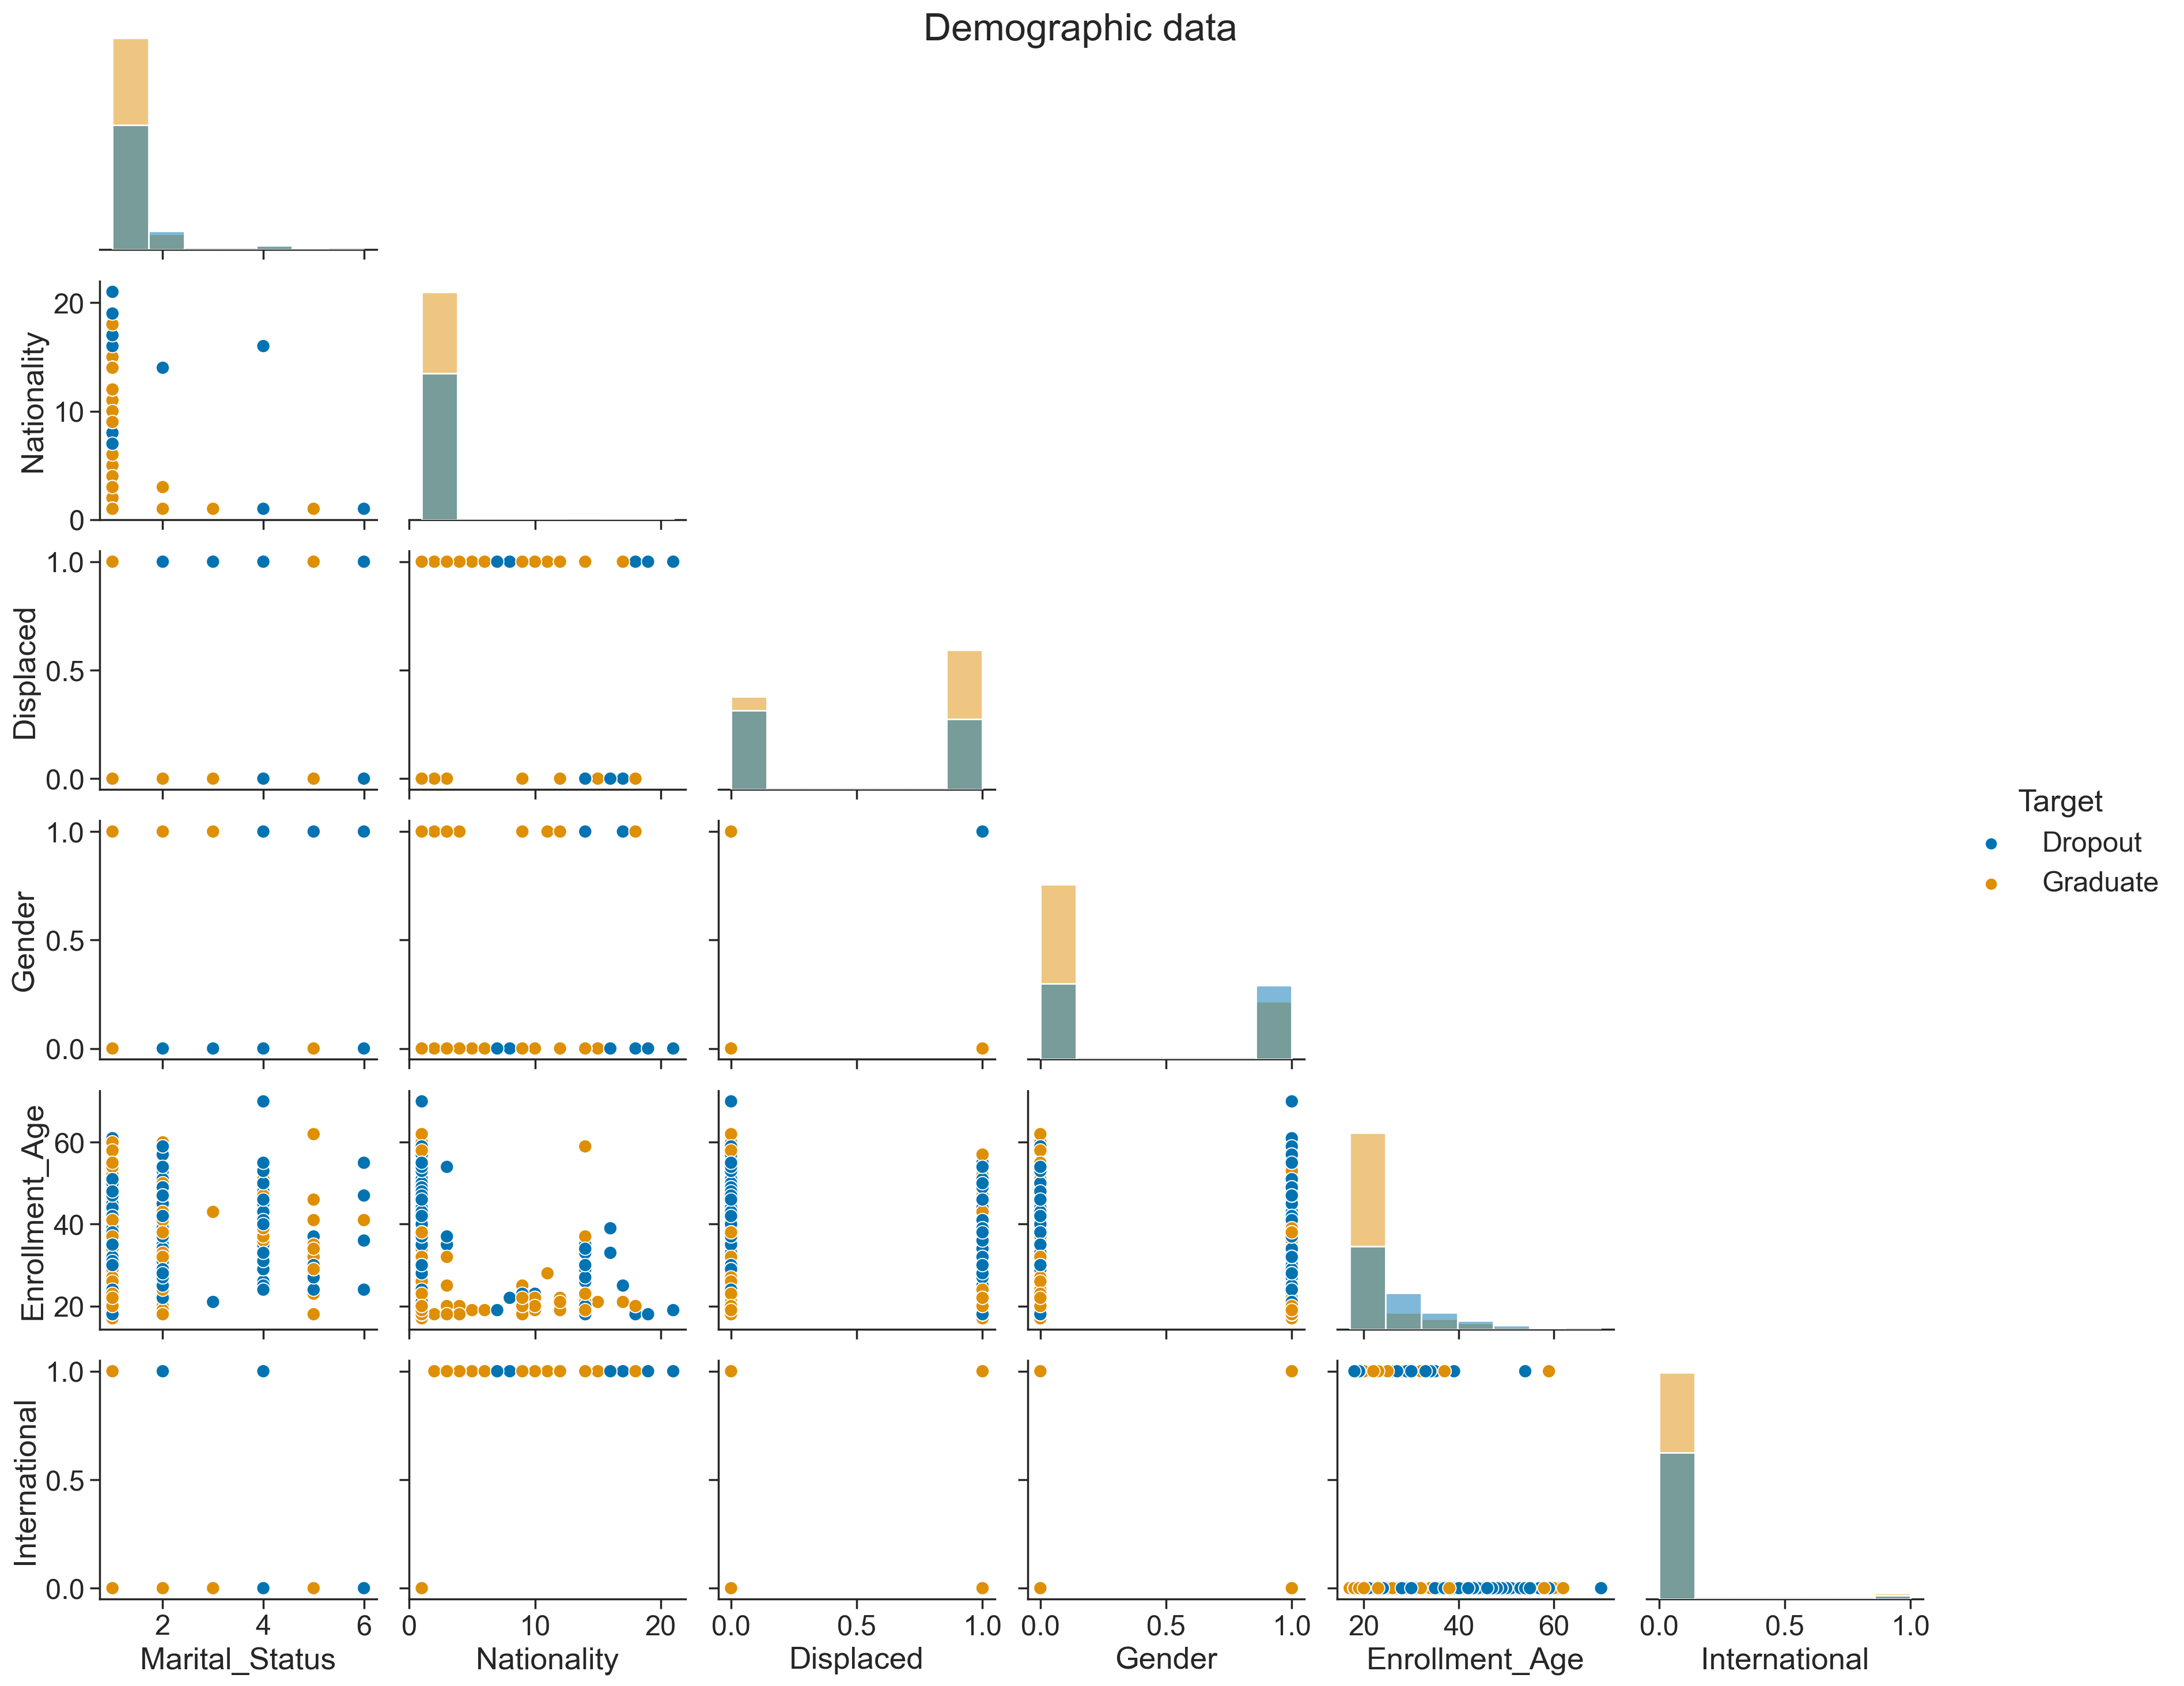

In [12]:
DD_scatter = sns.set(rc={"figure.dpi":200})
DD_scatter = sns.set(font_scale=1.6)
DD_scatter = sns.set_style("ticks")
DD_scatter = sns.pairplot(df, vars=['Marital_Status' , 'Nationality', 'Displaced', 'Gender',
                         'Enrollment_Age', 'International'], diag_kind = 'hist',
             hue='Target', corner='True', palette='colorblind', plot_kws={"s": 70}, diag_kws={'bins':7}, aspect=15/13)
DD_scatter.fig.suptitle("Demographic data", fontsize=24)
plt.show()

The data are quite unbalanced.  <br/>
The histogram(Enrollment_Age) shows that there is an age dependence of the successful completion of education. **People with younger enrollment age is more likely to successfully complete educational institutions**. <br/>
Topics for consideration:  <br/>
* What causes dominance of single value for Marital_Status, Nationality and International columns? <br/>


### C. Socioeconomic data <a id="10"></a>

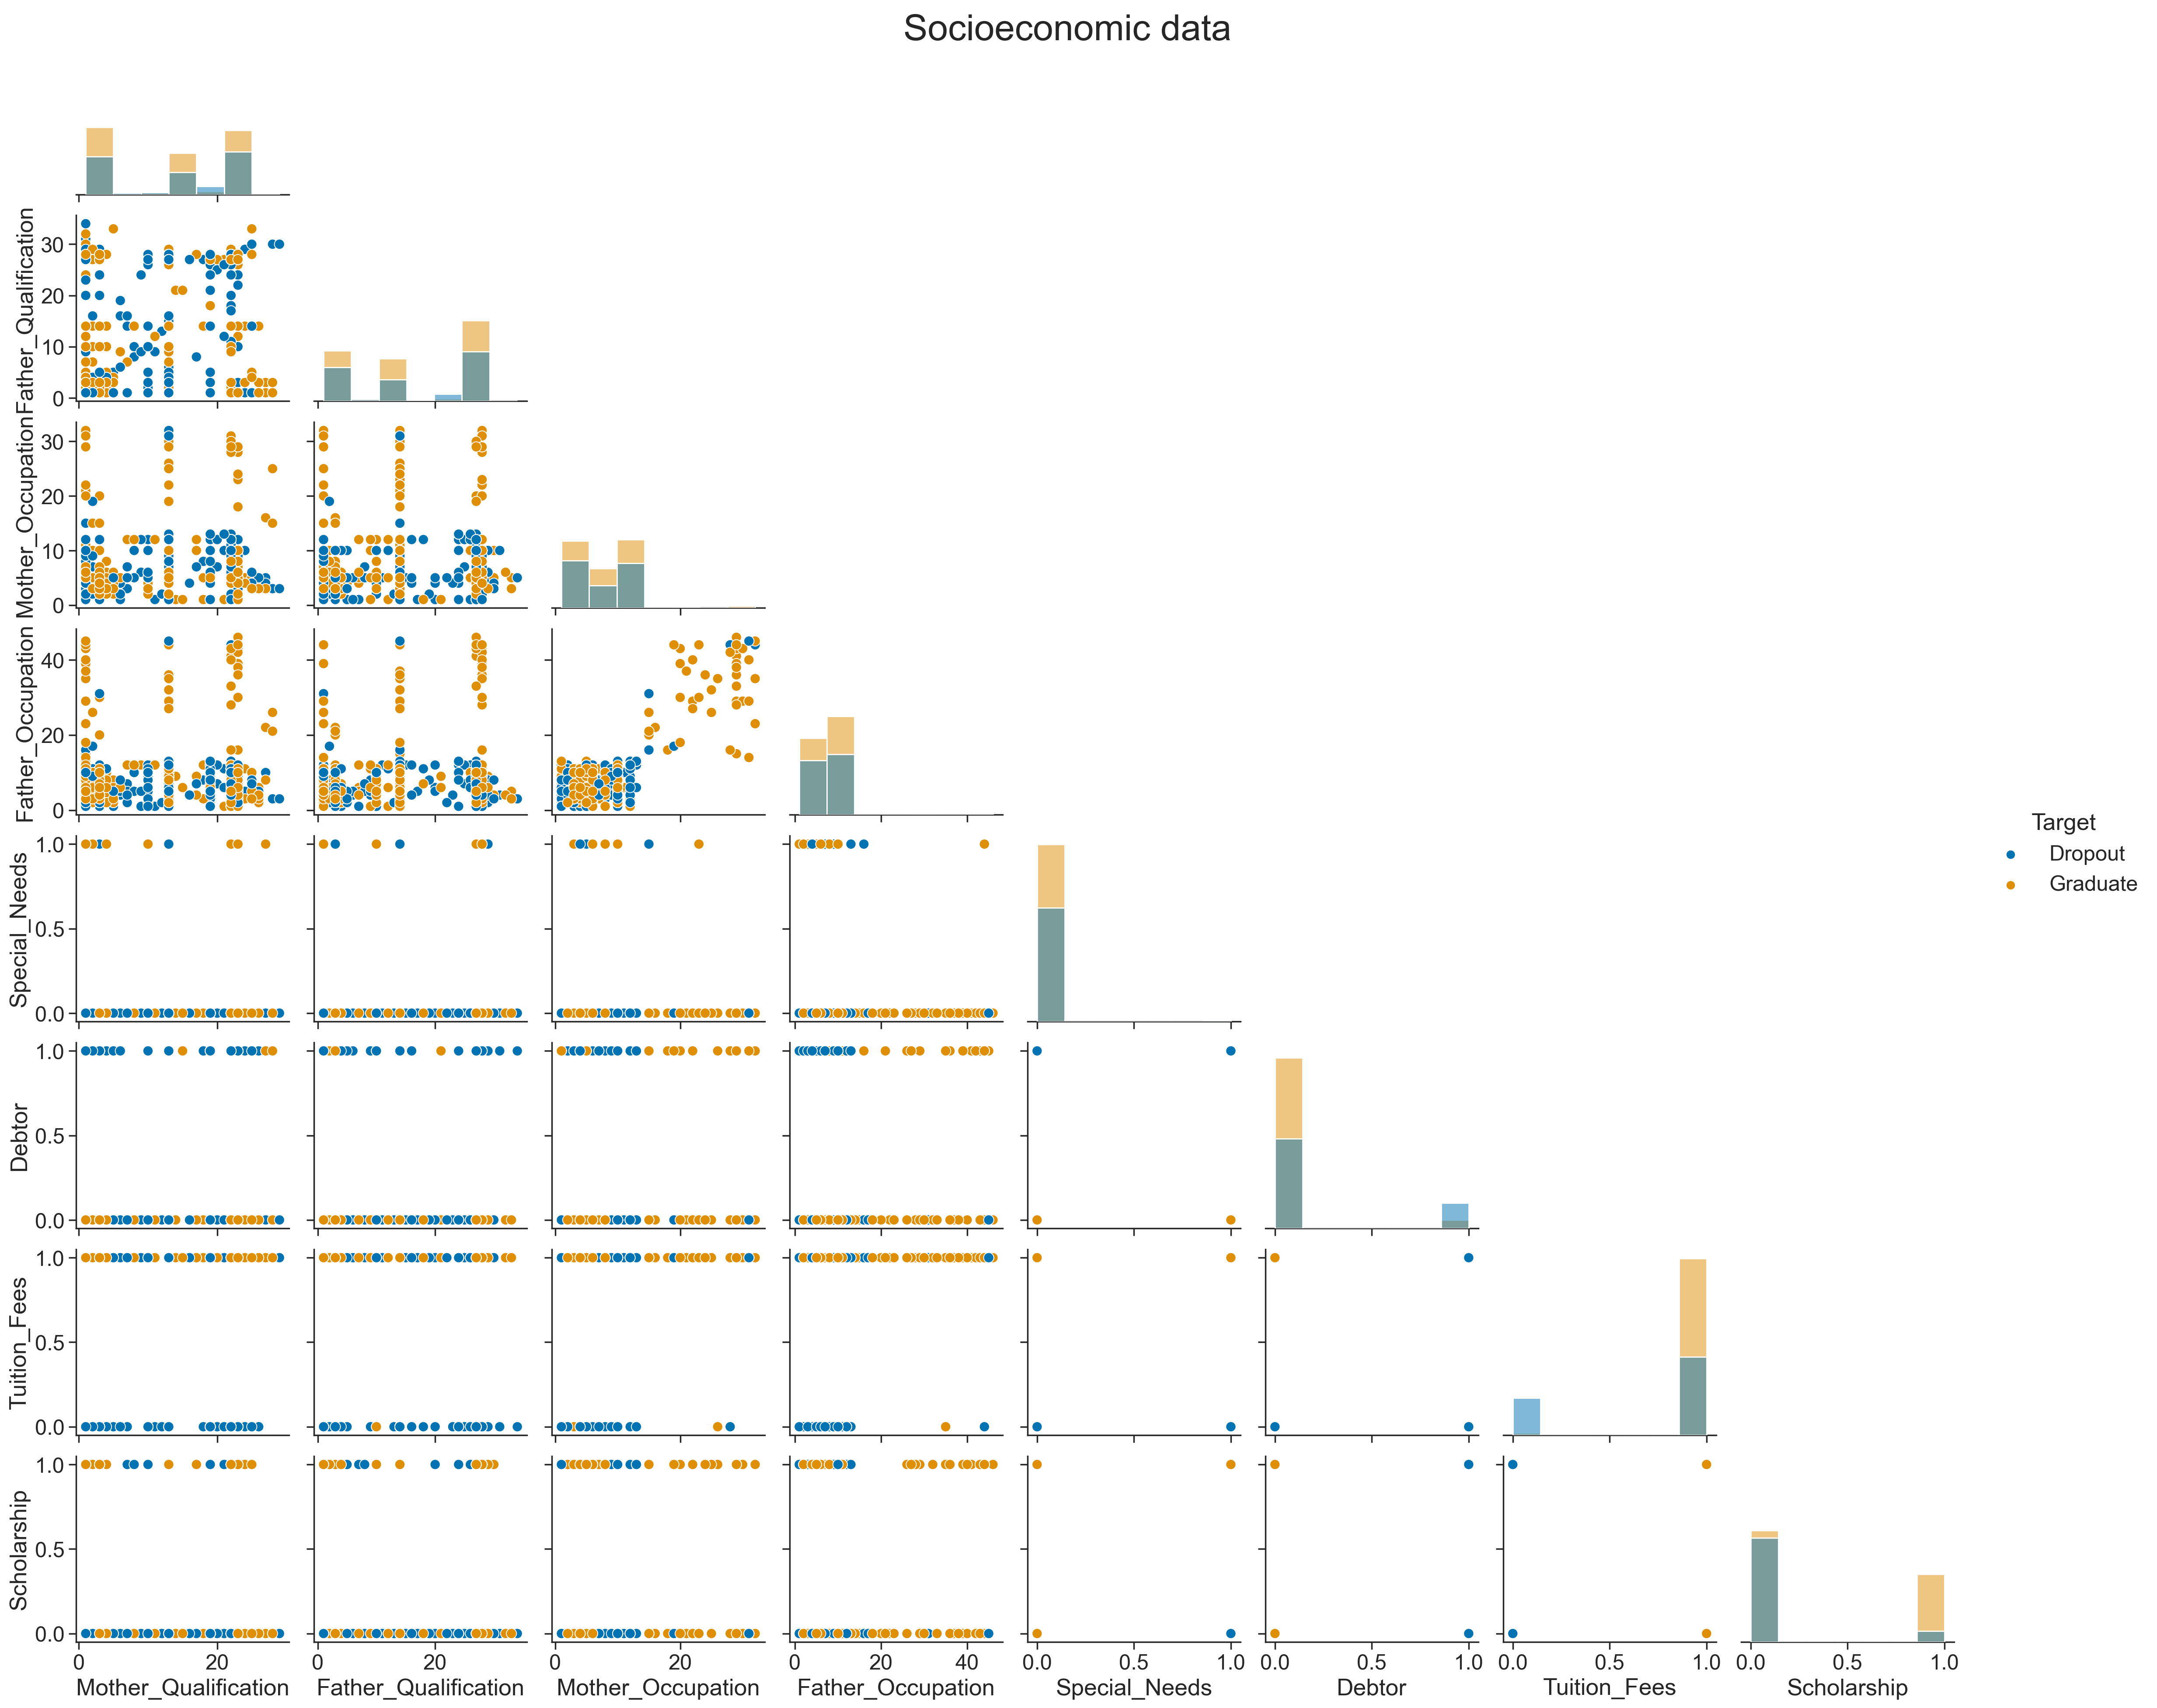

In [13]:
SED_scatter = sns.set(rc={"figure.dpi":200})
SED_scatter = sns.set(font_scale=1.6)
SED_scatter = sns.set_style("ticks")
SED_scatter = sns.pairplot(df, vars=["Mother_Qualification", "Father_Qualification", "Mother_Occupation", \
                                      "Father_Occupation", "Special_Needs", "Debtor", \
                                      "Tuition_Fees", "Scholarship"], \
                           diag_kind = 'hist', \
                           hue='Target', corner='True', palette='colorblind', plot_kws={"s": 70}, diag_kws={'bins':7}, aspect=15/13)
SED_scatter.fig.suptitle("Socioeconomic data", fontsize=30)
plt.show()

Topics for consideration:  <br/>
* How parents qualification affect to graduation?  <br/>
* Impact of the scholarship on graduation.

### D. Macroeconomic data and Academic data at enrollment <a id="11"></a>

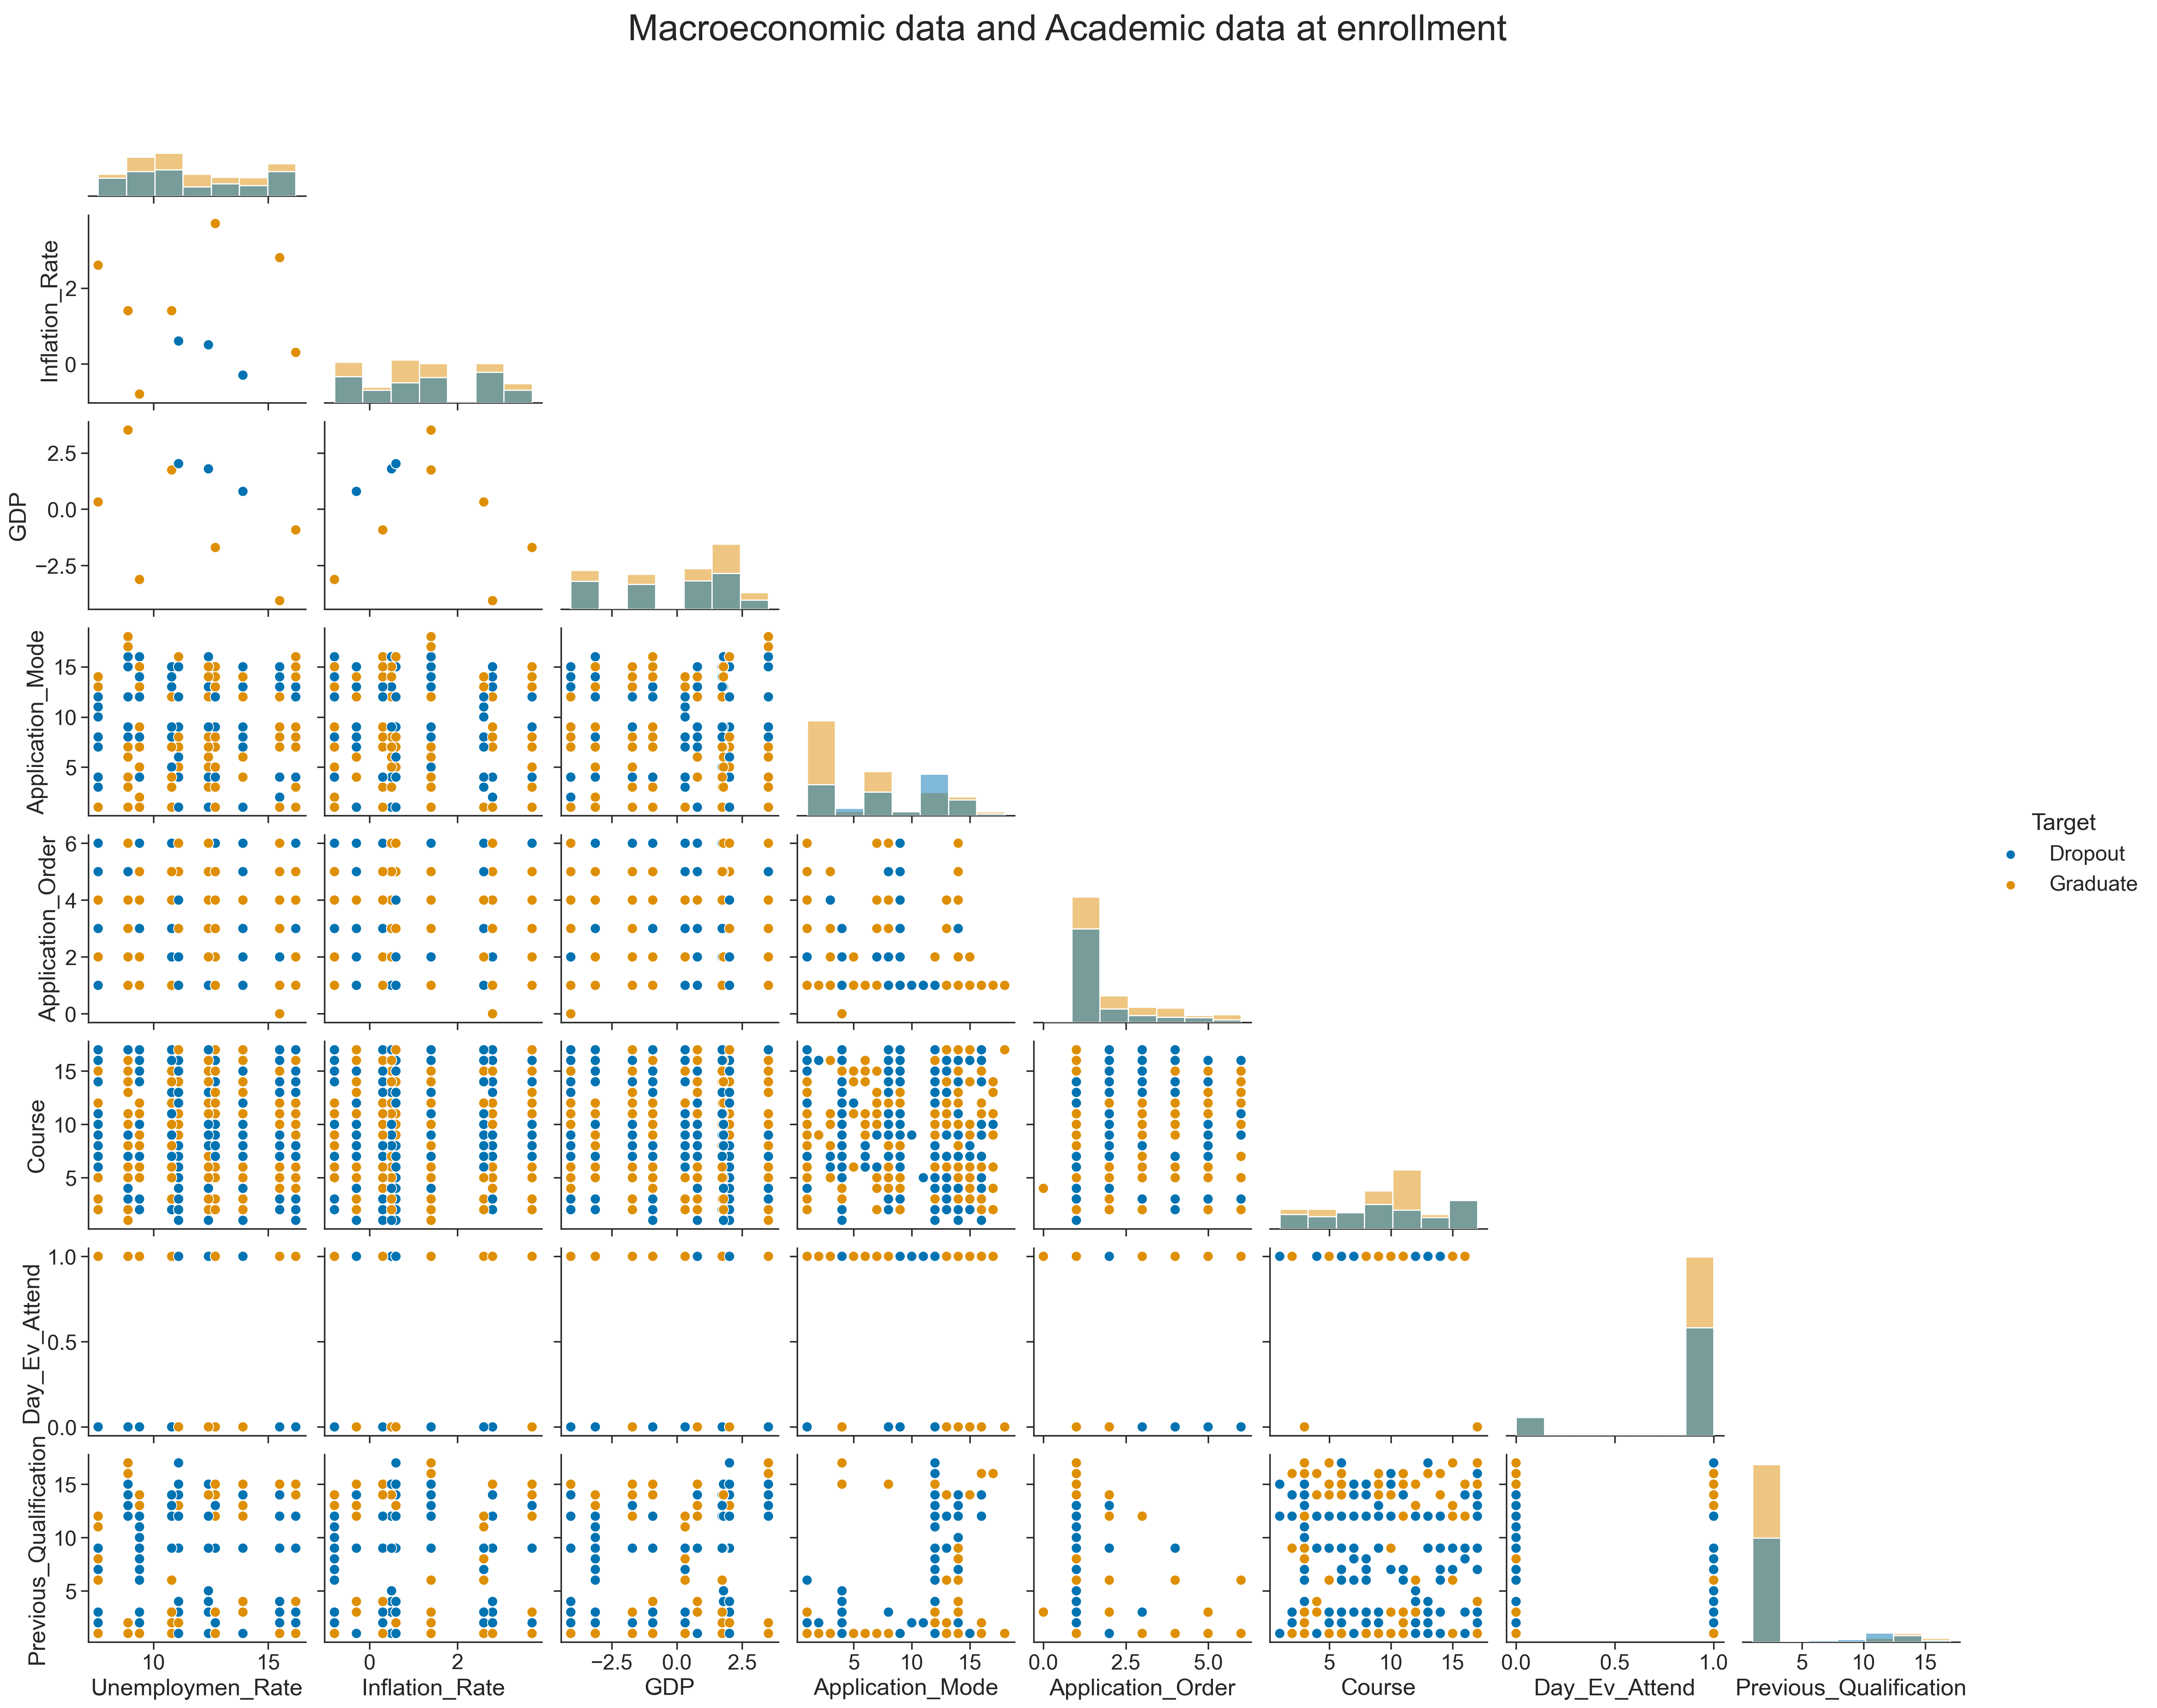

In [14]:
# Macroeconomic data and Academic data at enrollment
MaA_scatter = sns.set(rc={"figure.dpi":200})
MaA_scatter = sns.set(font_scale=1.6)
MaA_scatter = sns.set_style("ticks")
MaA_scatter = sns.pairplot(df, vars=["Unemploymen_Rate", "Inflation_Rate", "GDP", \
                                      "Application_Mode", "Application_Order", "Course", \
                                      "Day_Ev_Attend", "Previous_Qualification"], \
                           diag_kind = 'hist', \
                           hue='Target', corner='True', palette='colorblind', plot_kws={"s": 70}, diag_kws={'bins':7}, aspect=15/13)
MaA_scatter.fig.suptitle("Macroeconomic data and Academic data at enrollment", fontsize=30)
plt.show()

Topics for consideration:  <br/>
* The impact of previous qualifications on graduation.  <br/>
* The choice of which courses has a higher chance of successful completion of studies? <br/>

### E. Academic data at the end of 1st semester <a id="12"></a>

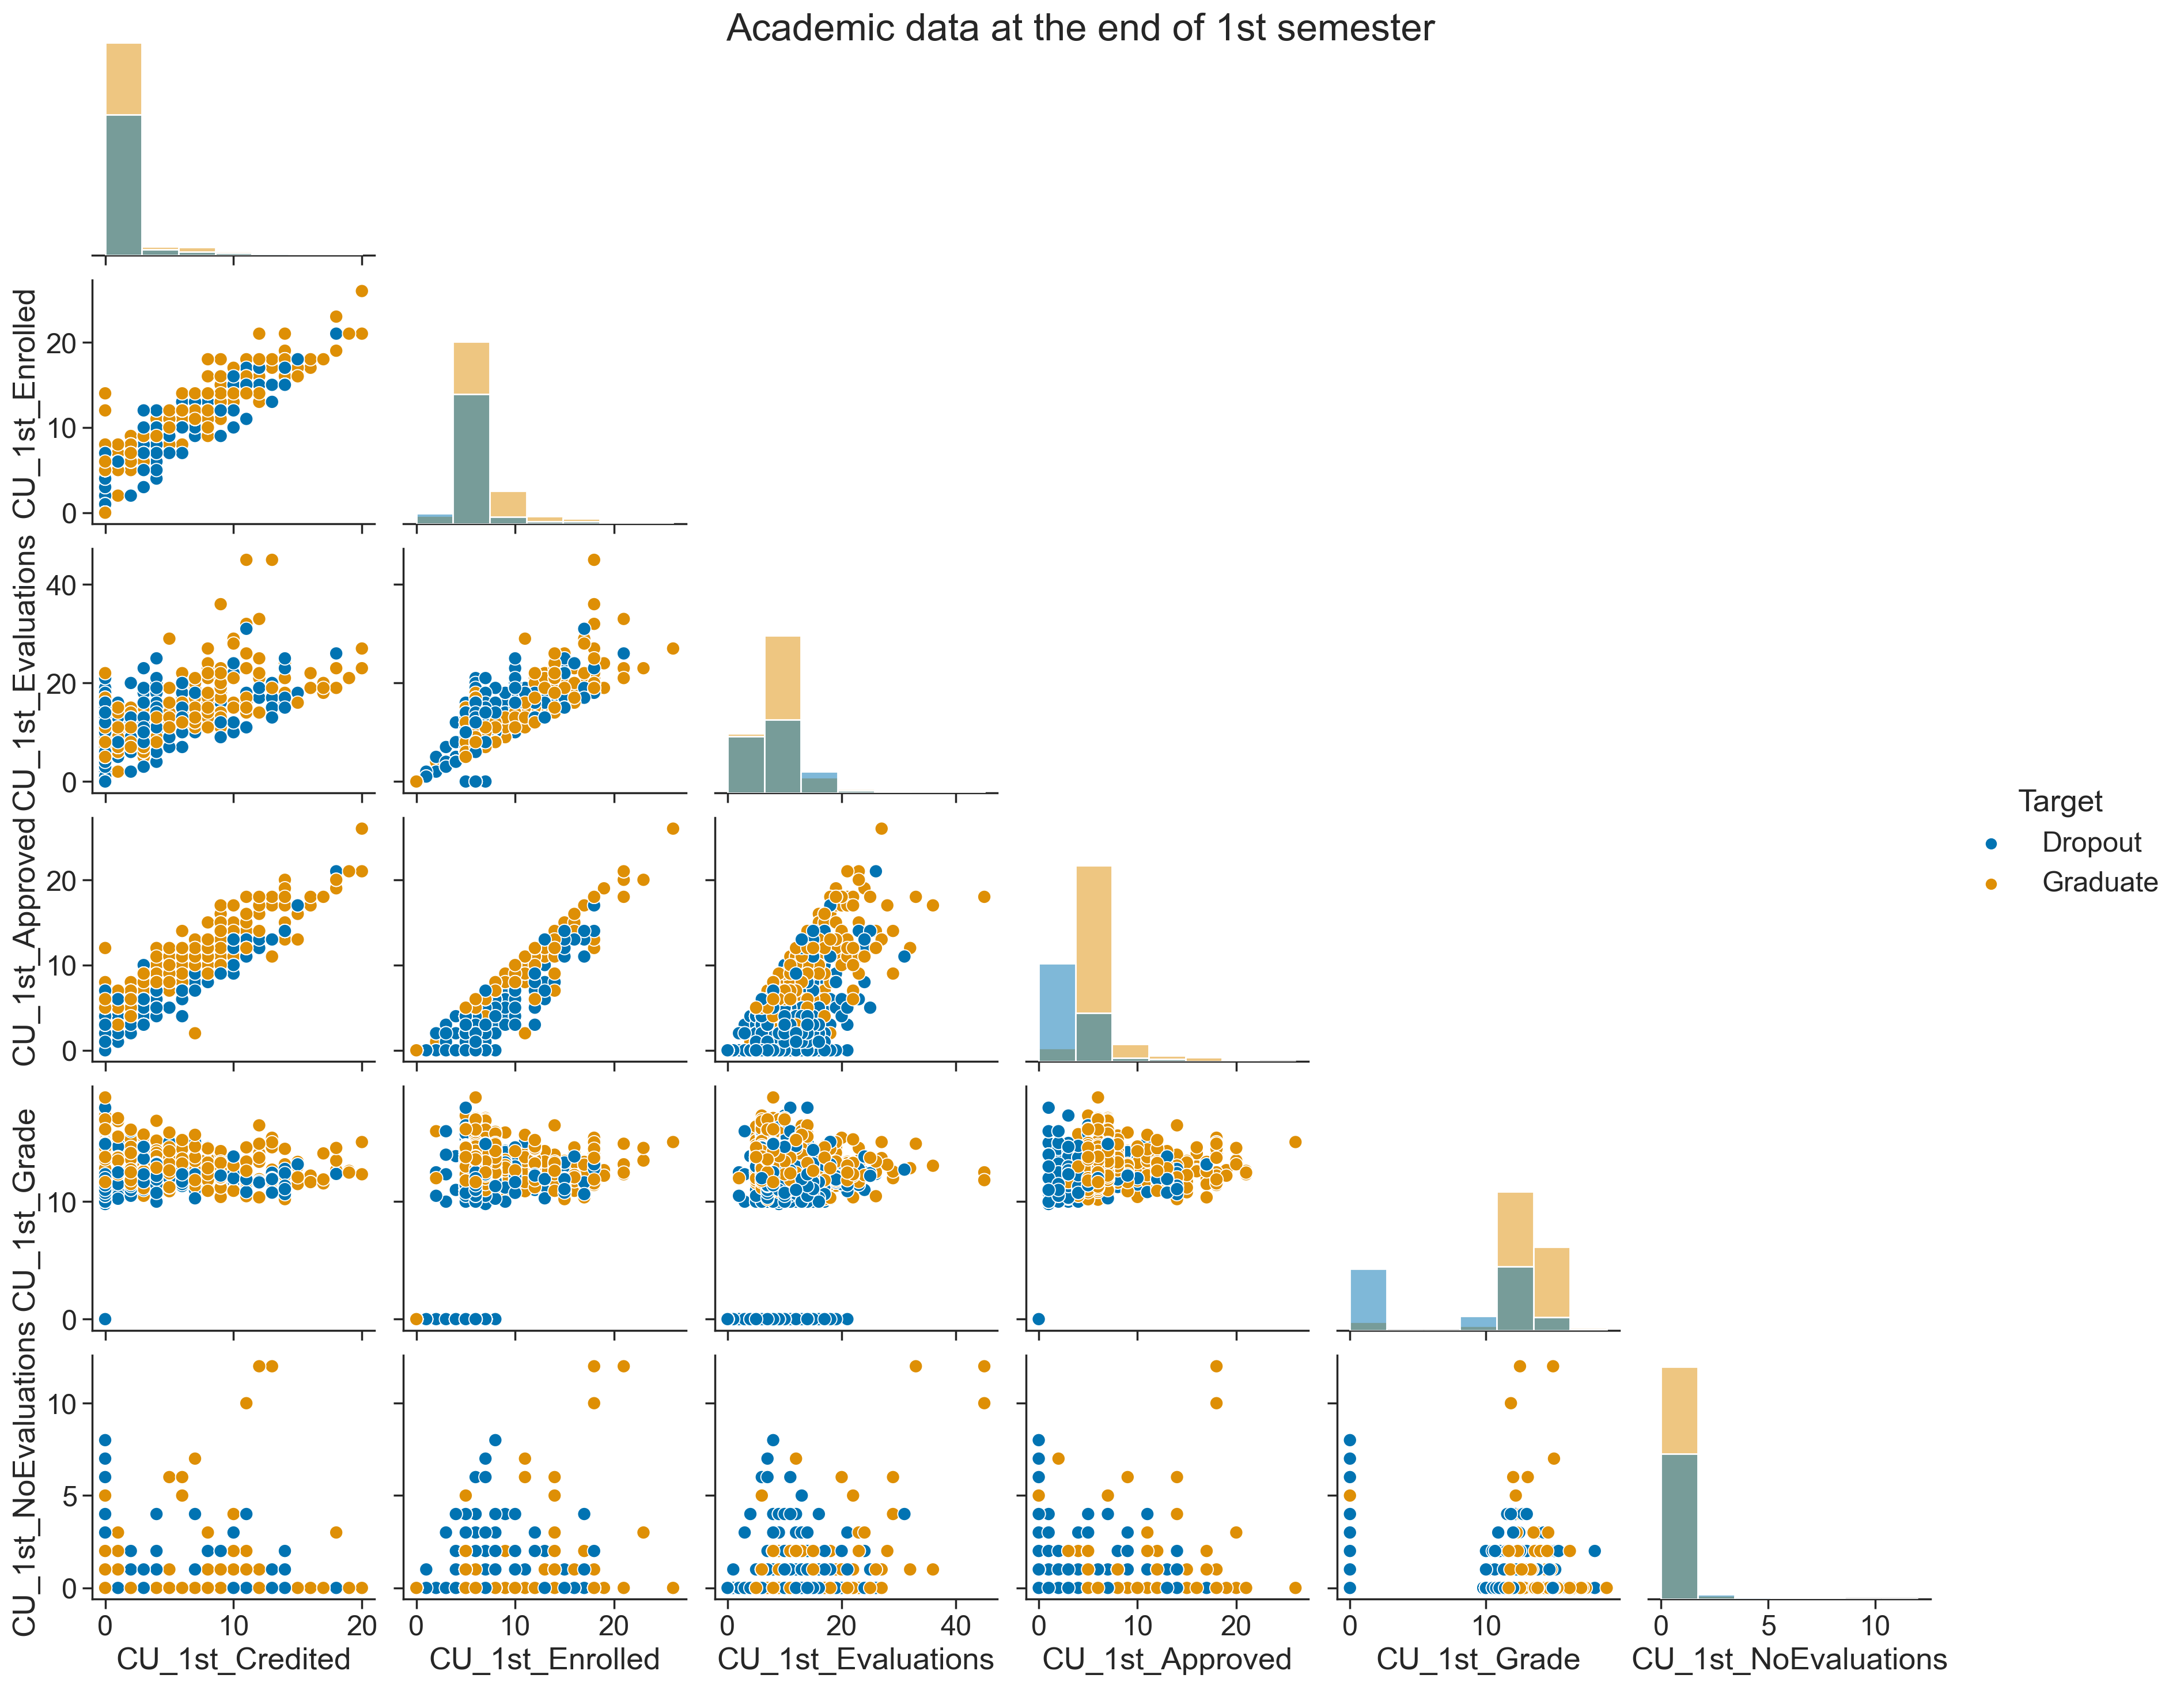

In [15]:
# Academic data at the end of 1st semester
A_1st_scatter = sns.set(rc={"figure.dpi":200})
A_1st_scatter = sns.set(font_scale=1.6)
A_1st_scatter = sns.set_style("ticks")
A_1st_scatter = sns.pairplot(df, vars=["CU_1st_Credited", "CU_1st_Enrolled", "CU_1st_Evaluations", \
                                      "CU_1st_Approved", "CU_1st_Grade", "CU_1st_NoEvaluations"], \
                           diag_kind = 'hist', \
                           hue='Target', corner='True', palette='colorblind', plot_kws={"s": 70}, diag_kws={'bins':7}, aspect=15/13)
A_1st_scatter.fig.suptitle("Academic data at the end of 1st semester", fontsize=24)
plt.show()

### F. Academic data at the end of 2nd semester <a id="13"></a>

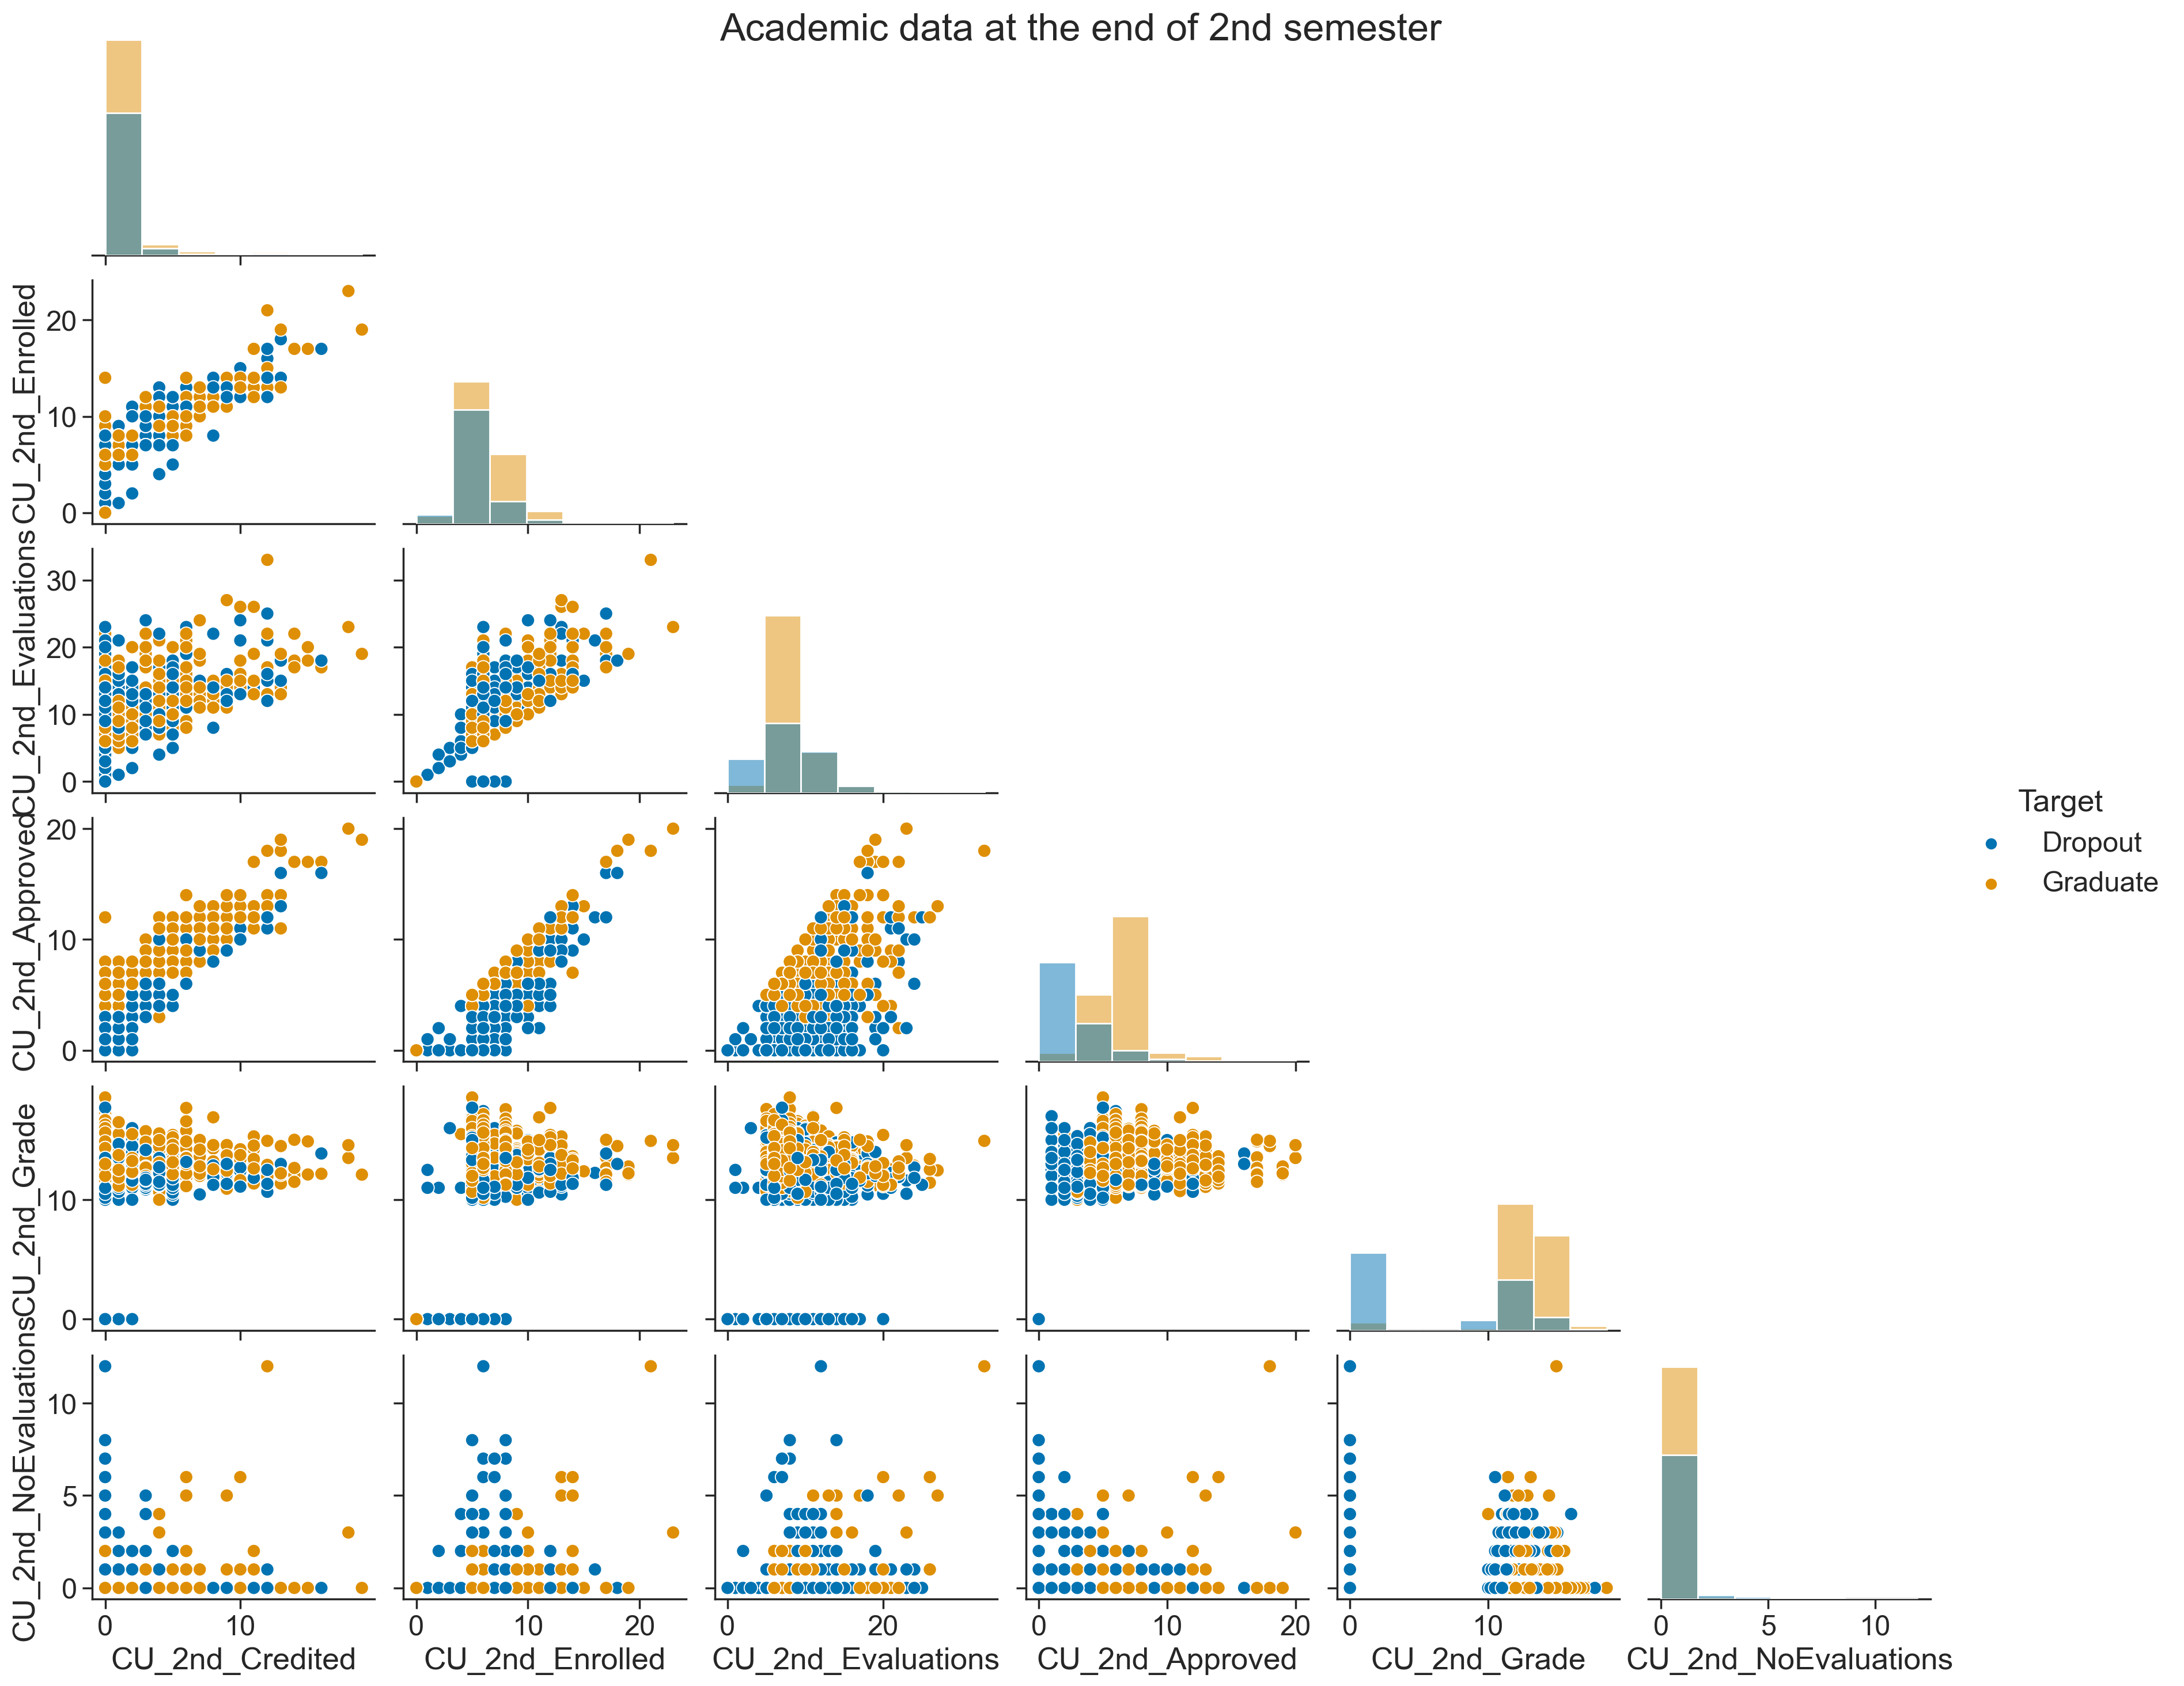

In [16]:
# Academic data at the end of 2nd semester
A_2nd_scatter = sns.set(rc={"figure.dpi":200})
A_2nd_scatter = sns.set(font_scale=1.6)
A_2nd_scatter = sns.set_style("ticks")
A_2nd_scatter = sns.pairplot(df, vars=["CU_2nd_Credited", "CU_2nd_Enrolled", "CU_2nd_Evaluations", \
                                      "CU_2nd_Approved", "CU_2nd_Grade", "CU_2nd_NoEvaluations"], \
                           diag_kind = 'hist', \
                           hue='Target', corner='True', palette='colorblind', plot_kws={"s": 70}, diag_kws={'bins':7}, aspect=15/13)
A_2nd_scatter.fig.suptitle("Academic data at the end of 2nd semester", fontsize=24)
plt.show()

Academic data 1st and 2nd term looks reasonable. And will be useful for the later ML model construction.

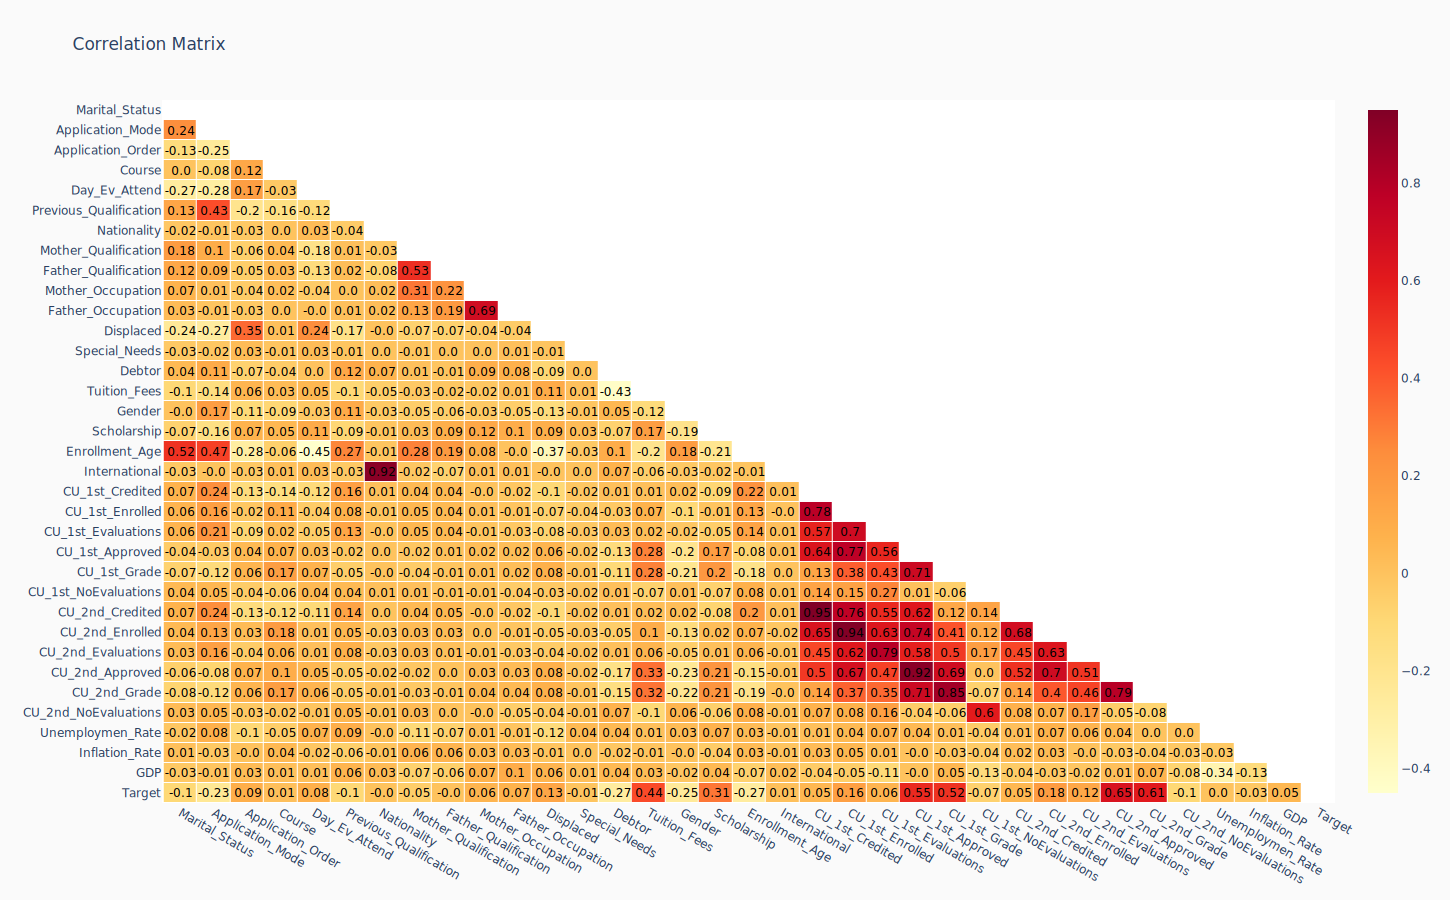

In [17]:
df["Target"].replace('Dropout', 0, inplace=True)
df["Target"].replace('Graduate', 1, inplace=True)

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)
font_colors = ['#1f77b4','black'] 
fig = ff.create_annotated_heatmap(z=df_mask.to_numpy().round(2), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  #colorscale=px.colors.diverging.RdBu,Bluyl #https://plotly.com/python/builtin-colorscales/
                                  colorscale=px.colors.sequential.YlOrRd,#YlGnBu,
                                  showscale=True, ygap=1, xgap=1,
                                  font_colors=font_colors
                                 )
fig.update_xaxes(side="bottom")
fig.update_layout(
    title='Correlation Matrix', width=1450, height=900,
    xaxis_showgrid=False, yaxis_showgrid=False,
    xaxis_zeroline=False, yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white',
    paper_bgcolor='#fafafa'
)
# Get rid of the NaN values from text 
for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

#fig.show()
fig.show(renderer="svg")

From Pearson's correlation function, one can see many relationships between independent and dependent quantities. In particular, multicollinearity for Curricular units 1st/2nd semestr groups, Nationality and International. Which should be taken into account when further building a machine learning model. <br/>
Topics for consideration: <br/>
* In addition to all the issues discussed earlier, it is clear that the Tuition_Fees is correlated with the dependent variable. So it will also be interesting to see "The impact of tuition fees on graduation". 

## 5. Questions about the data <a id="14"></a>

### A. What causes dominance of single value for Nationality, International and Marital_Status columns in demographic data? <a id="15"></a>

From Fig. Demographic data (nationality histogram) it can be seen that the Portuguese nationality strongly prevails over the rest. Let us analyze the number of other nationalities and the reasons and reasons why the data in this sense is one-sided.

In [18]:
nationalities = ((df.Nationality == 1) \
                 .replace({True: 'portuguese', False: 'other_nationalities'}))

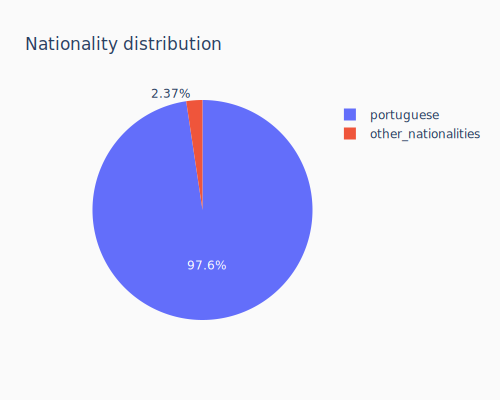

In [19]:
# Let's build a chart to determine how much one column(portuguese) prevails over others(other_nationalities).
fig_nationality = px.pie(nationalities,  names='Nationality',
            title='Nationality distribution', width=500,  height=400)
fig_nationality.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
fig_nationality.show(renderer="svg")

In [20]:
# number of international students among Portuguese
portuguese_international = (df.International[df.Nationality == 1]).sum()
# number of international students among other nationalities
other_nationalities_international = (df.International[df.Nationality != 1]).sum()
portuguese_international, other_nationalities_international

(0, 86)

In [21]:
# number of international value 1
df.International.value_counts()

0    3544
1      86
Name: International, dtype: int64

Having believed the data on internationality for the Portuguese nationality for other nationalities, it is clear that among the Portuguese there are zero international and all international nationality among other nationalities. This indicates that the **data was collected only for Portuguese educational institutions**.

Now let's look at why, among all the data, unmarried marital status dominates.

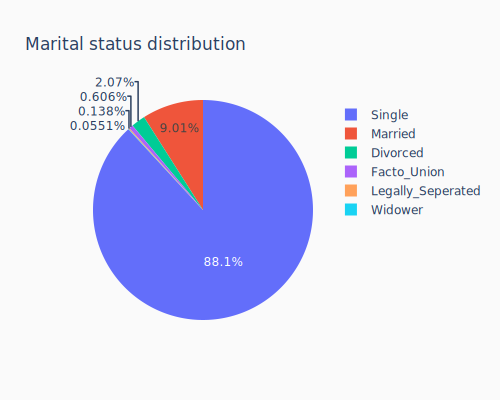

In [22]:
#Let's build a chart to determine how much one column prevails over others.
fig_Marital_Status_pie = px.pie(df["Marital_Status"].replace({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto_Union', 6: 'Legally_Seperated'}), names='Marital_Status',
            title='Marital status distribution', width=500,  height=400)
fig_Marital_Status_pie.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
fig_Marital_Status_pie.show(renderer="svg")

Determine how this data depends on age of enrollment and the average age of marriage by country(https://www.pordata.pt/en/portugal/mean+age+on+first+marriage+by+sex-421-5200) which is rounded equal 34 years old. Let's carry out these calculations in order to test the hypothesis that marital status is "Single", for the most part, is determined by the young age of students.

In [23]:
df1 = df.Marital_Status.replace({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto_Union', \
                                 6: 'Legally_Seperated'})[(df.Enrollment_Age <= 34)].value_counts()
df2 = df.Marital_Status.replace({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto_Union', \
                                 6: 'Legally_Seperated'})[(df.Enrollment_Age > 34)].value_counts()

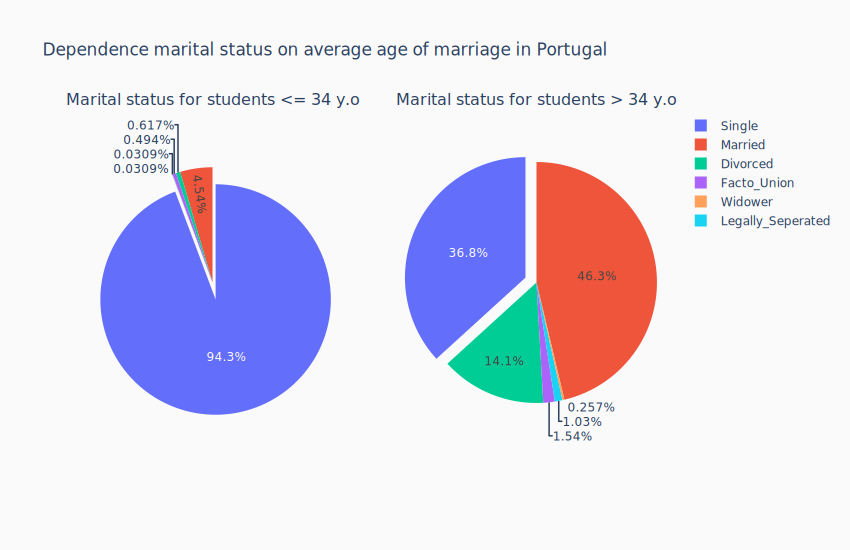

In [24]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles = ("Marital status for students <= 34 y.o ","Marital status for students > 34 y.o",))
fig.add_trace(go.Pie(labels=df1.index, values=df1, pull=[0.15, 0]),
              1, 1)
fig.add_trace(go.Pie(labels=df2.index, values=df2, pull=[0.0, 0.1]),
              1, 2)
fig.update_traces(hoverinfo="label+percent+name")
fig.update_layout(height = 550,width = 850, plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',title = "Dependence marital status on average age of marriage in Portugal")

fig.show(renderer="svg")

Comparing the results of marital status with the average age of marriage in Portugal and the age of participants in educational programs, it can be seen that the **predominance of the value "Single" is due to the fact that the majority of respondents in the database have a young age relative to the average age of marriage in Portugal**.

Consider how marrital status affecting academic progress of the students.

In [25]:
Marital_Status_vs_Target = pd.crosstab(df["Marital_Status"] \
                                       .replace({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto_Union', 6: 'Legally_Seperated'}), \
                                       df["Target"], normalize='index')
Marital_Status_vs_Target_unnormalize = pd.crosstab(df["Marital_Status"] \
                                       .replace({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto_Union', 6: 'Legally_Seperated'}), \
                                       df["Target"])
Marital_Status_vs_Target_unnormalize

Target                0     1
Marital_Status               
Divorced             42    33
Facto_Union          11    11
Legally_Seperated     4     1
Married             179   148
Single             1184  2015
Widower               1     1

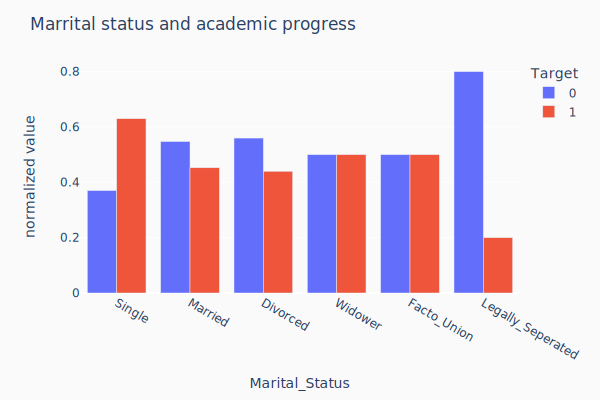

In [26]:
fig_Marital_Status = px.bar(Marital_Status_vs_Target, barmode = 'group', \
                           width=600,  height=400)
fig_Marital_Status.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa', title='Marrital status and academic progress')
fig_Marital_Status.update_yaxes(title_text="normalized value")
fig_Marital_Status.update_xaxes(categoryorder='array', categoryarray= ['Single', 'Married', 'Divorced', 'Widower'])
fig_Marital_Status.show(renderer="svg")

From the histogram, it can be seen that people with **marital status "Single" are more successful in graduating educational institutions** compared to the rest.

### B. How parents qualification affect to graduation? <a id="16"></a> 

Mother’s qualification / Father’s qualification (Numeric/discrete): 1—Secondary Education—12th Year of Schooling or Equivalent, 2—Higher Education—bachelor’s degree, 3—Higher Education—degree, 4—Higher Education—master’s degree, 5—Higher Education—doctorate, 6—Frequency of Higher Education, 7—12th Year of Schooling—not completed, 8—11th Year of Schooling—not completed, 9—7th Year (Old), 10—Other—11th Year of Schooling, 11—2nd year complementary high school course, 12—10th Year of Schooling, 13—General commerce course, 14—Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent, 15—Complementary High School Course, 16—Technical-professional course, 17—Complementary High School Course—not concluded, 18—7th year of schooling, 19—2nd cycle of the general high school course, 20—9th Year of Schooling—not completed, 21—8th year of schooling, 22—General Course of Administration and Commerce, 23—Supplementary Accounting and Administration, 24—Unknown, 25—Cannot read or write, 26—Can read without having a 4th year of schooling, 27—Basic education 1st cycle (4th/5th year) or equivalent, 28—Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent, 29—Technological specialization course, 30—Higher education—degree (1st cycle), 31—Specialized higher studies course, 32—Professional higher technical course, 33—Higher Education—master’s degree (2nd cycle), 34—Higher Education—doctorate (3rd cycle).

In [27]:
df["Target"].replace(0, 'Dropout', inplace=True)
df["Target"].replace(1, 'Graduate', inplace=True)
Mother_Qualification = df.loc[df['Mother_Qualification'].isin([2,3,4,5])]
Mother_Qualification_unnorm = pd.crosstab(Mother_Qualification["Mother_Qualification"], df["Target"])
Mother_Qualification_norm = pd.crosstab(Mother_Qualification["Mother_Qualification"]\
                                        .replace({2: "bachelor’s degree", 3: 'degree', 4: "master’s degree", 5: 'doctorate'}), \
                                        df["Target"], normalize='index')

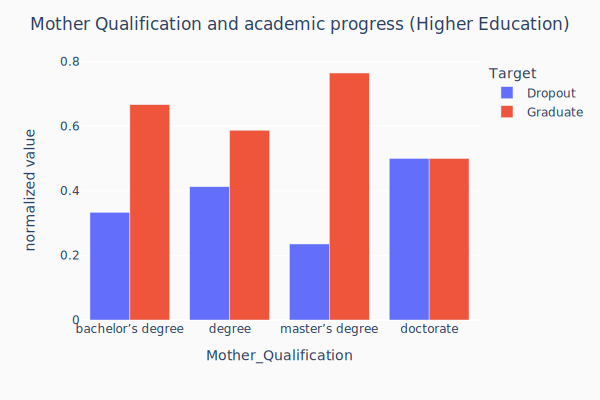

In [28]:
fig_Mother_Qualification = px.bar(Mother_Qualification_norm, barmode = 'group', \
                           width=600,  height=400)
fig_Mother_Qualification.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa', title='Mother Qualification and academic progress (Higher Education)')
fig_Mother_Qualification.update_yaxes(title_text="normalized value")
fig_Mother_Qualification.update_xaxes(categoryorder='array', \
                                categoryarray= ['bachelor’s degree', 'degree', 'master’s degree', 'doctorate'])
fig_Mother_Qualification.show(renderer="svg")

In general, it can be seen that a greater number of students who graduated from a higher educational institution had mothers with higher education.

#### Father_Qualification

In [29]:
FQ_with_HE = df.loc[df['Father_Qualification'].isin([2,3,4,5])]
FQ_with_HE_unnorm = pd.crosstab(FQ_with_HE["Father_Qualification"], df["Target"])
FQ_with_HE_norm = pd.crosstab(FQ_with_HE["Father_Qualification"]\
                                        .replace({2: "bachelor’s degree", 3: 'degree', 4: "master’s degree", 5: 'doctorate'}), \
                                        df["Target"], normalize='index')
#Father_Qualification_unnorm
FQ_with_HE_unnorm

Target                Dropout  Graduate
Father_Qualification                   
2                          22        21
3                          90       130
4                          14        18
5                          10         5

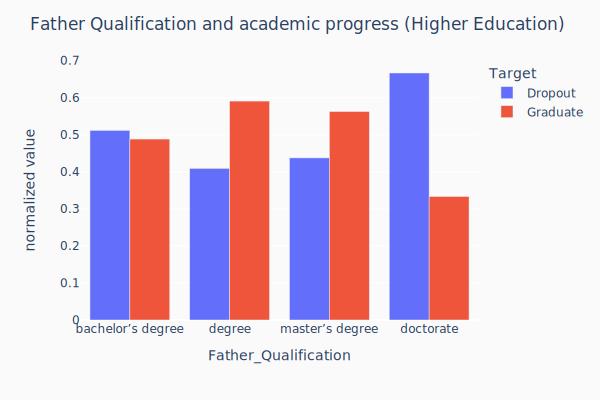

In [30]:
fig_FQ_with_HE = px.bar(FQ_with_HE_norm, barmode = 'group', \
                           width=600,  height=400)
fig_FQ_with_HE.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa', title='Father Qualification and academic progress (Higher Education)')
fig_FQ_with_HE.update_yaxes(title_text="normalized value")
fig_FQ_with_HE.update_xaxes(categoryorder='array', \
                                categoryarray= ['bachelor’s degree', 'degree', 'master’s degree', 'doctorate'])
fig_FQ_with_HE.show(renderer="svg")

* For students whose fathers have a higher education, the success of their higher education does not always prevail. 
* Fathers with PhD have half as many children who successfully complete their education.

In [31]:
# Father Qualification with Higher Education and Mother Qualification with Higher Education
Qualification_0 = df.loc[df['Father_Qualification'].isin([2,3,4,5]) & df['Mother_Qualification'].isin([2,3,4,5])]
Qualification_0 = Qualification_0.Target.value_counts().to_frame().T.rename(index= {'Target': 'Father-HE/Mother-HE'})
# Father Qualification with Higher Education and Mother Qualification without Higher Education
Qualification_1 = df.loc[(df['Father_Qualification'].isin([2,3,4,5])) & (~df['Mother_Qualification'].isin([2,3,4,5]))]
Qualification_1 = Qualification_1.Target.value_counts().to_frame().T.rename(index= {'Target': 'Father-HE/Mother-noHE'})
# Father Qualification without Higher Education and Mother Qualification with Higher Education
Qualification_2 = df.loc[(~df['Father_Qualification'].isin([2,3,4,5])) & (df['Mother_Qualification'].isin([2,3,4,5]))]
Qualification_2 = Qualification_2.Target.value_counts().to_frame().T.rename(index= {'Target': 'Father-noHE/Mother-HE'})
# Father Qualification without Higher Education and Mother Qualification without Higher Education
Qualification_3 = df.loc[(~df['Father_Qualification'].isin([2,3,4,5])) & (~df['Mother_Qualification'].isin([2,3,4,5]))]
Qualification_3 = Qualification_3.Target.value_counts().to_frame().T.rename(index= {'Target': 'Father-noHE/Mother-noHE'})

The ratio of students who completed their education to those who dropout, depending on the availability of higher education from their parents:

In [32]:
Qualification_00 = pd.concat([Qualification_0, Qualification_1, Qualification_2, Qualification_3])
Qualification_00.Graduate/Qualification_00.Dropout

Father-HE/Mother-HE        1.285714
Father-HE/Mother-noHE      1.271186
Father-noHE/Mother-HE      1.765306
Father-noHE/Mother-noHE    1.568660
dtype: float64

* From the coefficient obtained, it can be seen that the largest number of students who successfully graduated from an educational institution, the father does not have a higher education, while the mother has a higher education.
* The smallest number of students who successfully graduated from higher educational institutions are students whose father had a higher education and whose mother did not.

### C. Impact of the scholarship on graduation <a id="17"></a>

In [33]:
Scholarship_unnorm = pd.crosstab(df["Scholarship"]\
                                        .replace({0: "no", 1: 'yes'}), \
                                        df["Target"])
Scholarship_norm = pd.crosstab(df["Scholarship"]\
                                        .replace({0: "no", 1: 'yes'}), \
                                        df["Target"], normalize='index')
Scholarship_unnorm

Target       Dropout  Graduate
Scholarship                   
no              1287      1374
yes              134       835

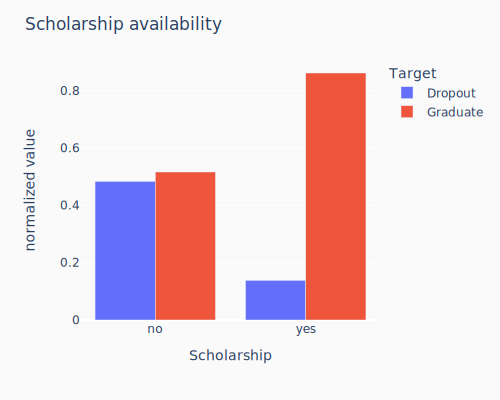

In [34]:
fig_Scholarship = px.bar(Scholarship_norm, barmode = 'group', \
                           width=500,  height=400)
fig_Scholarship.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa', title='Scholarship availability')
fig_Scholarship.update_yaxes(title_text="normalized value")
fig_Scholarship.update_xaxes(categoryorder='array')
fig_Scholarship.show(renderer="svg")

Students who had a scholarship are much more successful in graduating from educational institutions.

### D. The impact of previous qualifications on graduation <a id="18"></a>

Previous qualification (Numeric/discrete): 1—Secondary education, 2—Higher education—bachelor’s degree, 3—Higher education—degree, 4—Higher education—master’s degree, 5—Higher education—doctorate, 6—Frequency of higher education, 7—12th year of schooling—not completed, 8—11th year of schooling—not completed, 9—Other—11th year of schooling, 10—10th year of schooling, 11—10th year of schooling—not completed, 12—Basic education 3rd cycle (9th/10th/11th year) or equivalent, 13—Basic education 2nd cycle (6th/7th/8th year) or equivalent, 14—Technological specialization course, 15—Higher education—degree (1st cycle), 16—Professional higher technical course, 17—Higher education—master’s degree (2nd cycle).

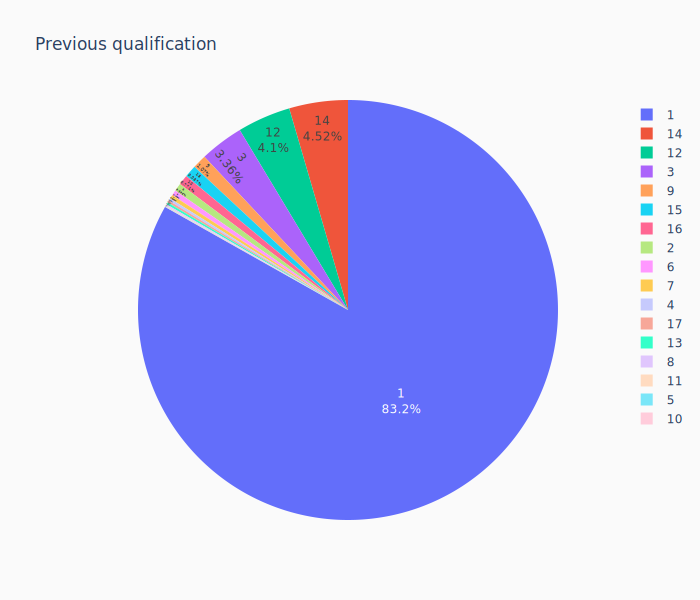

In [35]:
fig_PQ_pie = px.pie(df["Previous_Qualification"], names='Previous_Qualification',
            title='Previous qualification', width=700,  height=600)
fig_PQ_pie.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
fig_PQ_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_PQ_pie.show(renderer="svg")

The pie-chart shows that the vast majority of students before the survey had a secondary education.

Let's analyze what previous education allows you to increase the chances of graduating from an educational institution. To do this, consider the data categories with at least 3% threshold:

In [36]:
PQ = df.loc[df['Previous_Qualification'].isin([1,14,12,3])]
PQ_unnorm = pd.crosstab(PQ["Previous_Qualification"], df["Target"])
PQ_norm = pd.crosstab(PQ["Previous_Qualification"]\
                                        .replace({1: "Secondary_Education", 14: 'Technological_Specialization_Course', \
                                                 12: "Basic_Education_3rd_Cycle", 3: 'Higher_Education'}), \
                                        df["Target"], normalize='index')
PQ_unnorm

Target                  Dropout  Graduate
Previous_Qualification                   
1                          1078      1941
3                            75        47
12                          104        45
14                           69        95

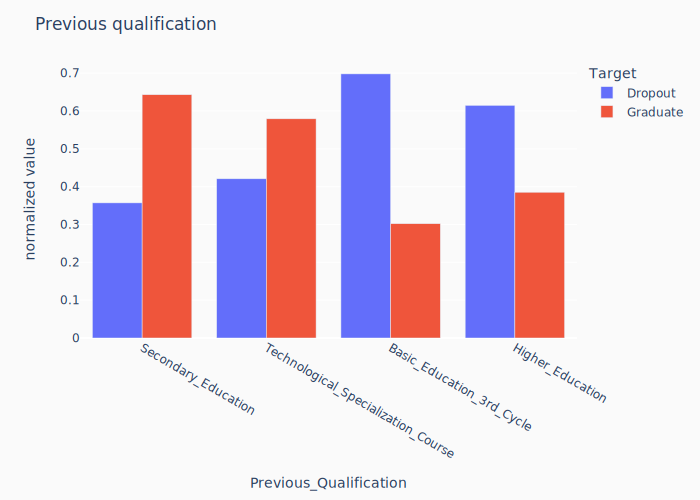

In [37]:
fig_PQ_norm = px.bar(PQ_norm, barmode = 'group', \
                           width=700,  height=500)
fig_PQ_norm.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa', title='Previous qualification')
fig_PQ_norm.update_yaxes(title_text="normalized value")
fig_PQ_norm.update_xaxes(categoryorder='array', \
                                categoryarray= ['Secondary_Education', 'Technological_Specialization_Course', 'Basic_Education_3rd_Cycle', 'Higher_Education'])
fig_PQ_norm.show(renderer="svg")

The histogram shows that people whose primary education were "higher education" or "Basic education 3rd cycle (9th/10th/11th year) or equivalent" were less successful in graduating from an educational institution.

### E. The choice of which courses has a higher chance of successful completion of studies? <a id="19"></a> 

Course (Numeric/discrete): 1—Biofuel Production Technologies, 2—Animation and Multimedia Design, 3—Social Service (evening attendance), 4—Agronomy, 5—Communication Design, 6—Veterinary Nursing, 7—Informatics Engineering, 8—Equiniculture, 9—Management, 10—Social Service, 11—Tourism, 12—Nursing, 13—Oral Hygiene, 14—Advertising and Marketing Management, 15—Journalism and Communication, 16—Basic Education, 17—Management (evening attendance). 

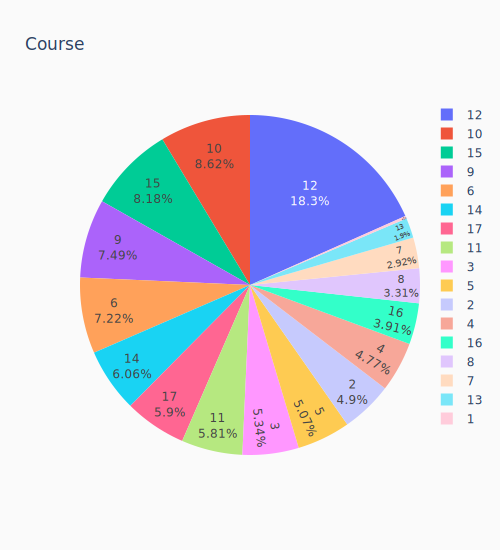

In [38]:
fig_Course_pie = px.pie(df["Course"], names='Course',
            title='Course', width=500,  height=550)
fig_Course_pie.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
fig_Course_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_Course_pie.show(renderer="svg")

The pie-chart shows that the nursing course is the most popular, but it does not go far from the rest, the data is distributed more or less normally.

Now let's see how many students successfully complete their education for different courses:

In [39]:
Course_unnorm = pd.crosstab(df["Course"], df["Target"])
Course_unnorm

Target  Dropout  Graduate
Course                   
1             8         1
2            82        96
3            71       123
4            86        87
5            51       133
6            90       172
7            92        14
8            78        42
9           134       138
10           65       248
11           96       115
12          118       548
13           33        36
14           95       125
15          101       196
16           85        57
17          136        78

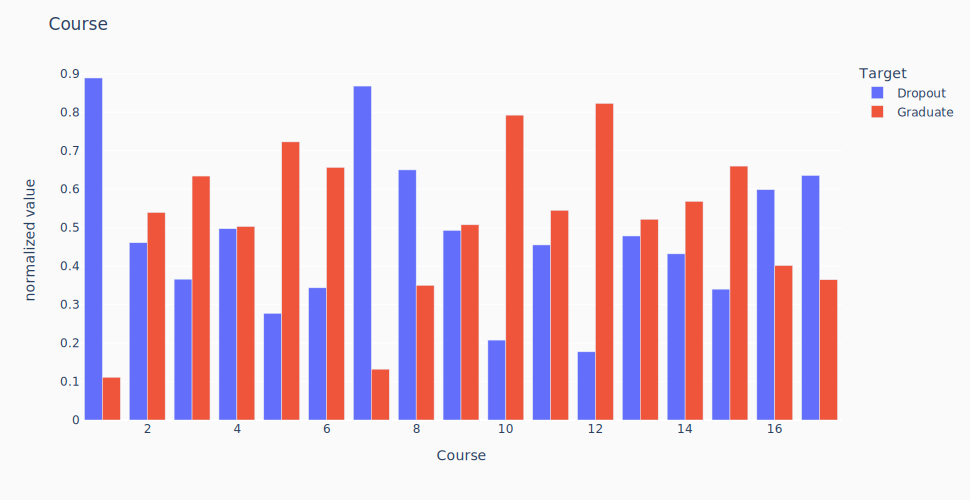

In [40]:
Course_norm = pd.crosstab(df["Course"], df["Target"], normalize='index')
fig_Course_norm = px.bar(Course_norm, barmode = 'group', \
                           width=970,  height=500)
fig_Course_norm.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa', title='Course')
fig_Course_norm.update_yaxes(title_text="normalized value")
fig_Course_norm.update_xaxes(categoryorder='array')
fig_Course_norm.show(renderer="svg")

In addition to the histogram, which clearly shows the normalized value of successful or unsuccessful completion of each of the courses, let's look at the relationship Graduate/Dropout:

In [41]:
Course_norm.Graduate/Course_norm.Dropout

Course
1     0.125000
2     1.170732
3     1.732394
4     1.011628
5     2.607843
6     1.911111
7     0.152174
8     0.538462
9     1.029851
10    3.815385
11    1.197917
12    4.644068
13    1.090909
14    1.315789
15    1.940594
16    0.670588
17    0.573529
dtype: float64

From this relationship, it can be seen that the nursing course has a larger number of successfully graduated students (Graduate/Dropout=4.64).  1—Biofuel Production Technologies, 7—Informatics Engineering, 8—Equiniculture, 16—Basic Education, 17—Management courses have the number of students who drop out of education is greater than those who successfully complete it.

### F. The impact of tuition fees on graduation <a id="20"></a>

In [42]:
df["Tuition_Fees"].value_counts()

1    3144
0     486
Name: Tuition_Fees, dtype: int64

Most of the respondents had a scholarship.

In [43]:
Tuition_Fees_unnorm = pd.crosstab(df["Tuition_Fees"]\
                                        .replace({0: "no", 1: 'yes'}), \
                                        df["Target"])  
Tuition_Fees_norm = pd.crosstab(df["Tuition_Fees"]\
                                        .replace({0: "no", 1: 'yes'}), \
                                        df["Target"], normalize='index')
Tuition_Fees_unnorm

Target        Dropout  Graduate
Tuition_Fees                   
no                457        29
yes               964      2180

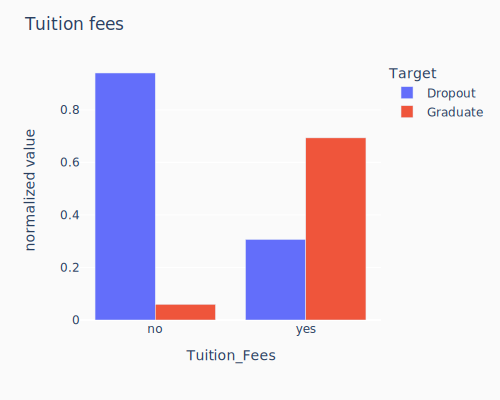

In [44]:
fig_Tuition_Fees_norm = px.bar(Tuition_Fees_norm, barmode = 'group', \
                           width=500,  height=400)
fig_Tuition_Fees_norm.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa', title='Tuition fees')
fig_Tuition_Fees_norm.update_yaxes(title_text="normalized value")
fig_Tuition_Fees_norm.update_xaxes(categoryorder='array')
fig_Tuition_Fees_norm.show(renderer="svg")

Students who successfully graduated from an educational institution had a tuition fees.

## 6. Summary <a id="21"></a>

The provided summary discusses various factors that affect the successful completion of educational institutions based on the given dataset. The dataset is found to be unbalanced, with a strong age dependence of successful completion of education. Younger enrollment age is found to be positively correlated with successful completion of education. Multicollinearity is observed for some groups, including Curricular units 1st/2nd semestr groups, Nationality, and International, which need to be considered while building a machine learning model.<br/>
* The dominance of a single value for Nationality, International, and Marital_Status columns in demographic data is attributed to the fact that the data was collected only for Portuguese educational institutions. The predominance of the value "Single" for Marital_Status is due to the young age of students, which is lower than the average age of marriage in Portugal. Students with the Marital_Status "Single" are found to be more successful in graduating educational institutions than the rest.<br/>
* The educational qualifications of parents also affect the successful completion of education. Mothers with higher education are found to have a greater number of students who graduated from higher educational institutions. However, for fathers with higher education, the success of their children in higher education does not always prevail. Students whose fathers have a Ph.D. have half as many successful graduates as those with fathers without higher education. The largest number of successful graduates is found to have mothers with higher education and fathers without higher education.<br/>
* The impact of scholarships on graduation is found to be significant, with students having scholarships being much more successful in graduating from educational institutions. The previous education of students is also found to affect the chances of graduating from educational institutions. Students with primary education in "higher education" or "Basic education 3rd cycle (9th/10th/11th year) or equivalent" are found to be less successful in graduating from educational institutions.<br/>
* The choice of courses also affects the successful completion of education. The nursing course is found to have a higher chance of successful completion, while Biofuel Production Technologies, Informatics Engineering, Equiniculture, Basic Education, and Management courses have a higher number of dropouts than successful graduates. Finally, students who successfully graduated from an educational institution had a tuition fees..

## 7. References <a id="22"></a> 

1) https://zenodo.org/record/5777340#.ZAJvJy8w1QK <br/>
2) https://www.kaggle.com/code/nawazkhanpathan/end-to-end-student-s-academic-success-rate-predict <br/>
3) https://www.pordata.pt/en/portugal/mean+age+on+first+marriage+by+sex-421-5200 <br/>
4) https://www.youtube.com/watch?v=xi0vhXFPegw&list=LL&index=25&t=2141s